# **Problem Statement**

**Goal:**
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

**Dataset:** 

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

Train_Data
Test_Data

**Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)**

The training set can be used to build your machine learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

**Data Dictionary:**

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

Evaluation Criteria:

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.
 
In other words, the best possible accuracy is 100% (or 1) and the worst possible accuracy 0%

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, precision_recall_curve

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### **Read the dataset**

In [2]:
survey_train=pd.read_csv("Surveydata_train.csv")
travel_train=pd.read_csv("Traveldata_train.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data_survey_train=survey_train.copy()
data_travel_train=travel_train.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data_survey_train.head(5)

ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improvement                  Good      Excellent   
3           Acceptable     Needs Improvement     Acceptable   
4    Needs Improvement                  Good      Excellent   

  Ease_of_Online_Booking    Onboard_Service            Legroom  \
0      Needs Improvement  Needs Improvement         Acceptable   
1                   Good          Excellent  Needs Improvement   
2              Excellent          Excellent          Excellent   
3             Acceptable         Acceptable         Acceptable   
4                   Good               Good               Good   

    Baggage_Handling    CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement               Good  Needs Improvement            Poor  
1               Poor  Needs Improvement               Good            Good  
2          Excellent               Good          Excellent       Excellent  
3         Acceptable               Good         Acceptable      Acceptable  
4               Good               Good               Good            Good

In [5]:
data_travel_train.head(5)

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0

In [7]:
# Display last 5 rows
data_survey_train.tail(5)
data_travel_train.tail(5)

ID  Overall_Experience       Seat_Comfort Seat_Class  \
94374  98894375                   0               Poor   Ordinary   
94375  98894376                   1               Good   Ordinary   
94376  98894377                   1  Needs Improvement  Green Car   
94377  98894378                   0  Needs Improvement   Ordinary   
94378  98894379                   0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
94374                    Good               Good         Convenient   
94375                    Good               Good         Convenient   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                     NaN  Needs Improvement         Convenient   
94378                    Poor         Acceptable         Manageable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
94374                 Poor                  Poor           Poor   
94375    Needs Improvement             Excellent      Excellent   
94376                 Good             Excellent           Good   
94377                 Good     Needs Improvement           Good   
94378           Acceptable            Acceptable     Acceptable   

      Ease_of_Online_Booking Onboard_Service     Legroom Baggage_Handling  \
94374                   Poor            Good        Good             Good   
94375             Acceptable      Acceptable  Acceptable       Acceptable   
94376                   Good            Good        Good             Good   
94377                   Good      Acceptable        Good             Good   
94378             Acceptable            Poor        Good             Good   

         CheckIn_Service Cleanliness Online_Boarding  
94374  Needs Improvement        Good            Poor  
94375               Good  Acceptable            Good  
94376         Acceptable        Good      Acceptable  
94377               Good   Excellent            Good  
94378               Poor        Good      Acceptable

### **Understand the shape of the dataset**

In [9]:
# Check the shape of the data
data_survey_train.shape
data_travel_train.shape

(94379, 9)

### **Check the data types of the columns**

In [10]:
# Check info of the data
data_survey_train.info()
data_travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

### **Check for missing values**

In [14]:
# Analyse missing values - Hint: use isnull() function
data_survey_train.isnull().sum()
#data_travel_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [4]:
# Check the percentage of missing values in the each column.
data_survey_train.isnull().sum()/data_survey_train.shape[0]*100
#data_travel_train.isnull().sum()/data_travel_train.shape[0]*100

ID                         0.000000
Overall_Experience         0.000000
Seat_Comfort               0.064633
Seat_Class                 0.000000
Arrival_Time_Convenient    9.461851
Catering                   9.261594
Platform_Location          0.031787
Onboard_Wifi_Service       0.031787
Onboard_Entertainment      0.019072
Online_Support             0.096420
Ease_of_Online_Booking     0.077348
Onboard_Service            8.053698
Legroom                    0.095360
Baggage_Handling           0.150457
CheckIn_Service            0.081586
Cleanliness                0.006357
Online_Boarding            0.006357
dtype: float64

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [5]:
data_ts = data_travel_train.merge(data_survey_train,left_on="ID",right_on="ID",how="inner")

In [6]:
data_ts

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0      98800001  Female  Loyal Customer  52.0              NaN     Business   
1      98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2      98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3      98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4      98800005  Female  Loyal Customer  50.0  Business Travel     Business   
...         ...     ...             ...   ...              ...          ...   
94374  98894375    Male  Loyal Customer  32.0  Business Travel     Business   
94375  98894376    Male  Loyal Customer  44.0  Business Travel     Business   
94376  98894377    Male             NaN  63.0  Business Travel     Business   
94377  98894378    Male  Loyal Customer  16.0  Personal Travel          Eco   
94378  98894379    Male  Loyal Customer  54.0              NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0                  272                      0.0                    5.0   
1                 2200                      9.0                    0.0   
2                 1061                     77.0                  119.0   
3                  780                     13.0                   18.0   
4                 1981                      0.0                    0.0   
...                ...                      ...                    ...   
94374             1357                     83.0                  125.0   
94375              592                      5.0                   11.0   
94376             2794                      0.0                    0.0   
94377             2744                      0.0                    0.0   
94378             2107                     28.0                   28.0   

       Overall_Experience       Seat_Comfort Seat_Class  \
0                       0  Needs Improvement  Green Car   
1                       0               Poor   Ordinary   
2                       1  Needs Improvement  Green Car   
3                       0         Acceptable   Ordinary   
4                       1         Acceptable   Ordinary   
...                   ...                ...        ...   
94374                   0               Poor   Ordinary   
94375                   1               Good   Ordinary   
94376                   1  Needs Improvement  Green Car   
94377                   0  Needs Improvement   Ordinary   
94378                   0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
0                   Excellent          Excellent    Very Convenient   
1                   Excellent               Poor  Needs Improvement   
2           Needs Improvement  Needs Improvement  Needs Improvement   
3           Needs Improvement                NaN  Needs Improvement   
4                  Acceptable         Acceptable         Manageable   
...                       ...                ...                ...   
94374                    Good               Good         Convenient   
94375                    Good               Good         Convenient   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                     NaN  Needs Improvement         Convenient   
94378                    Poor         Acceptable         Manageable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                     Good     Needs Improvement     Acceptable   
1                     Good                  Poor           Good   
2        Needs Improvement                  Good      Excellent   
3               Acceptable     Needs Improvement     Acceptable   
4        Needs Improvement                  Good      Excellent   
...                    ...                   ...            ...   
94374                 Poor                  Poor           Poor   
94375    Needs Improvement             Excellent      Excellent   
94376     

In [7]:
data_ts.loc[data_ts['ID'] == 98800196]

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
195  98800196  Female  Loyal Customer  58.0  Business Travel     Business   

     Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
195              419                      0.0                    0.0   

     Overall_Experience Seat_Comfort Seat_Class Arrival_Time_Convenient  \
195                   1         Poor   Ordinary                     NaN   

    Catering Platform_Location Onboard_Wifi_Service Onboard_Entertainment  \
195     Poor      Inconvenient           Acceptable                  Good   

    Online_Support Ease_of_Online_Booking Onboard_Service Legroom  \
195      Excellent                   Good            Good    Good   

    Baggage_Handling CheckIn_Service Cleanliness Online_Boarding  
195             Good      Acceptable        Good       Excellent

In [67]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [8]:
cat_cols = data_ts.select_dtypes(['object']).columns.tolist()

In [9]:
cat_cols.append('Overall_Experience')

In [10]:
cat_cols

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Overall_Experience']

In [11]:
for i in cat_cols:
    data_ts[i] = data_ts[i].astype('category')

In [12]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94302 non-null  category
 2   Customer_Type            85428 non-null  category
 3   Age                      94346 non-null  float64 
 4   Type_Travel              85153 non-null  category
 5   Travel_Class             94379 non-null  category
 6   Travel_Distance          94379 non-null  int64   
 7   Departure_Delay_in_Mins  94322 non-null  float64 
 8   Arrival_Delay_in_Mins    94022 non-null  float64 
 9   Overall_Experience       94379 non-null  category
 10  Seat_Comfort             94318 non-null  category
 11  Seat_Class               94379 non-null  category
 12  Arrival_Time_Convenient  85449 non-null  category
 13  Catering                 85638 non-null  category
 14  Platfo

In [13]:
data_ts.describe().T

count          mean           std         min  \
ID                       94379.0  9.884719e+07  27245.014865  98800001.0   
Age                      94346.0  3.941965e+01     15.116632         7.0   
Travel_Distance          94379.0  1.978888e+03   1027.961019        50.0   
Departure_Delay_in_Mins  94322.0  1.464709e+01     38.138781         0.0   
Arrival_Delay_in_Mins    94022.0  1.500522e+01     38.439409         0.0   

                                25%         50%         75%         max  
ID                       98823595.5  98847190.0  98870784.5  98894379.0  
Age                            27.0        40.0        51.0        85.0  
Travel_Distance              1359.0      1923.0      2538.0      6951.0  
Departure_Delay_in_Mins         0.0         0.0        12.0      1592.0  
Arrival_Delay_in_Mins           0.0         0.0        13.0      1584.0

In [14]:
data_ts.describe(include =  'category').T

count unique              top   freq
Gender                   94302      2           Female  47815
Customer_Type            85428      2   Loyal Customer  69823
Type_Travel              85153      2  Business Travel  58617
Travel_Class             94379      2              Eco  49342
Overall_Experience       94379      2                1  51593
Seat_Comfort             94318      6       Acceptable  21158
Seat_Class               94379      2        Green Car  47435
Arrival_Time_Convenient  85449      6             Good  19574
Catering                 85638      6       Acceptable  18468
Platform_Location        94349      6       Manageable  24173
Onboard_Wifi_Service     94349      6             Good  22835
Onboard_Entertainment    94361      6             Good  30446
Online_Support           94288      6             Good  30016
Ease_of_Online_Booking   94306      6             Good  28909
Onboard_Service          86778      6             Good  27265
Legroom                  94289      6             Good  28870
Baggage_Handling         94237      5             Good  34944
CheckIn_Service          94302      6             Good  26502
Cleanliness              94373      6             Good  35427
Online_Boarding          94373      6             Good  25533

In [15]:
# Checking the count of unique values in each categorical column 
cat_cols= data_ts.select_dtypes(['category'])

for i in cat_cols.columns:
    print('Unique values in',i, 'are :')
    print(data_ts[i].value_counts(dropna=False))
    print('*'*40)

Unique values in Gender are :
Female    47815
Male      46487
NaN          77
Name: Gender, dtype: int64
****************************************
Unique values in Customer_Type are :
Loyal Customer       69823
Disloyal Customer    15605
NaN                   8951
Name: Customer_Type, dtype: int64
****************************************
Unique values in Type_Travel are :
Business Travel    58617
Personal Travel    26536
NaN                 9226
Name: Type_Travel, dtype: int64
****************************************
Unique values in Travel_Class are :
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64
****************************************
Unique values in Overall_Experience are :
1    51593
0    42786
Name: Overall_Experience, dtype: int64
****************************************
Unique values in Seat_Comfort are :
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor   

In [16]:
# Instead of looking at absolute values we can check the percentages which give a clearer picture of data distribution

for i in cat_cols.columns:
    print('Unique values in',i, 'are :')
    print(data_ts[i].value_counts(dropna=False)/data_ts.shape[0]*100)
    print('*'*40)

Unique values in Gender are :
Female    50.662753
Male      49.255661
NaN        0.081586
Name: Gender, dtype: float64
****************************************
Unique values in Customer_Type are :
Loyal Customer       73.981500
Disloyal Customer    16.534399
NaN                   9.484101
Name: Customer_Type, dtype: float64
****************************************
Unique values in Type_Travel are :
Business Travel    62.108096
Personal Travel    28.116424
NaN                 9.775480
Name: Type_Travel, dtype: float64
****************************************
Unique values in Travel_Class are :
Eco         52.280698
Business    47.719302
Name: Travel_Class, dtype: float64
****************************************
Unique values in Overall_Experience are :
1    54.665763
0    45.334237
Name: Overall_Experience, dtype: float64
****************************************
Unique values in Seat_Comfort are :
Acceptable           22.418123
Needs Improvement    22.193496
Good                 21.8215

## **Exploratory Data Analysis (EDA) and Visualization**

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [77]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

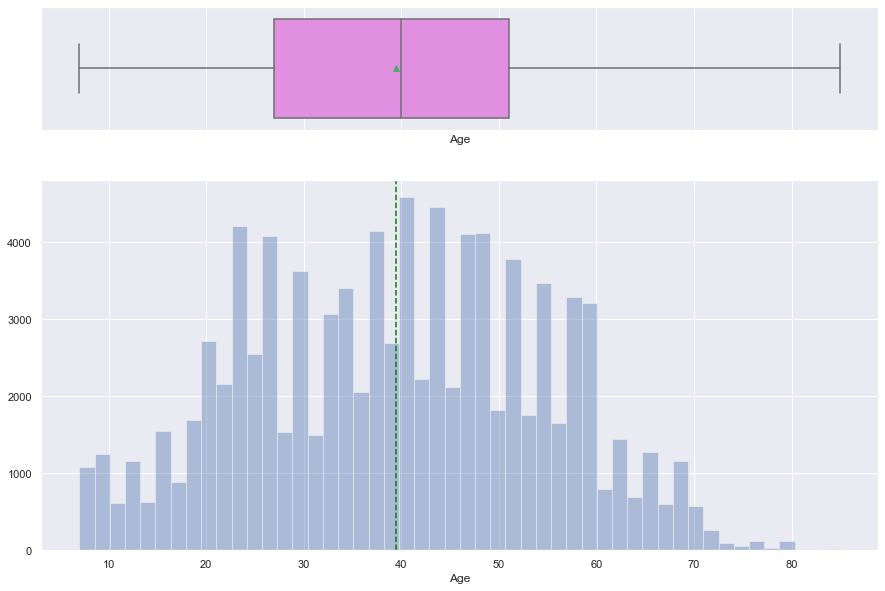

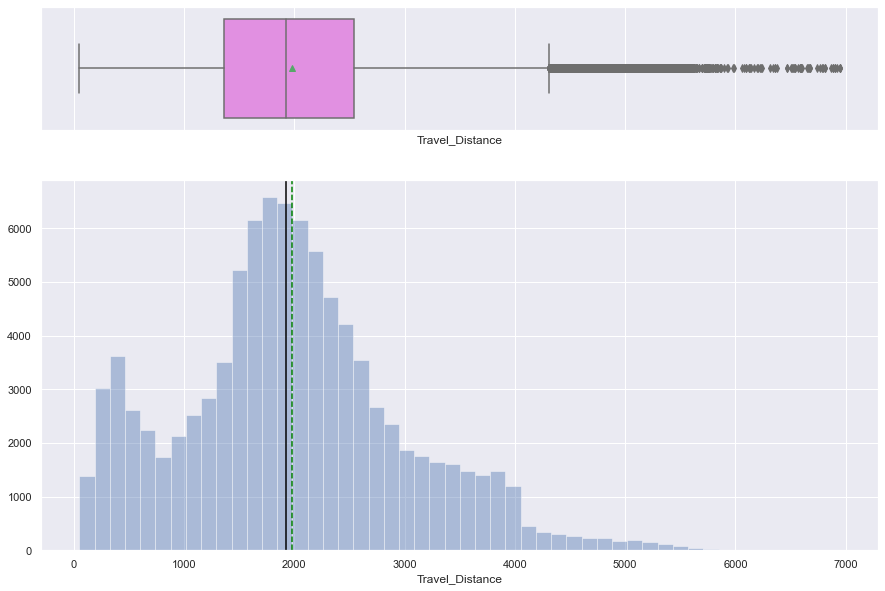

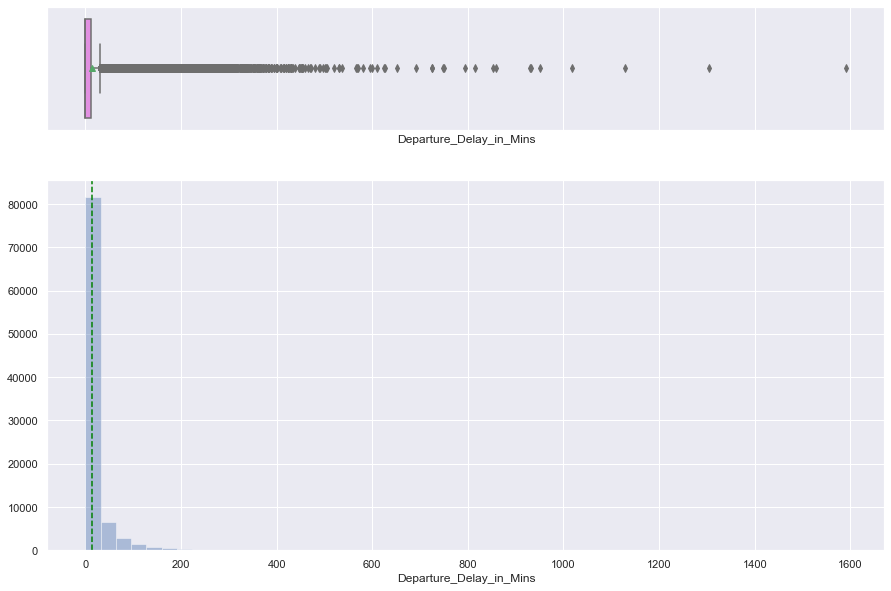

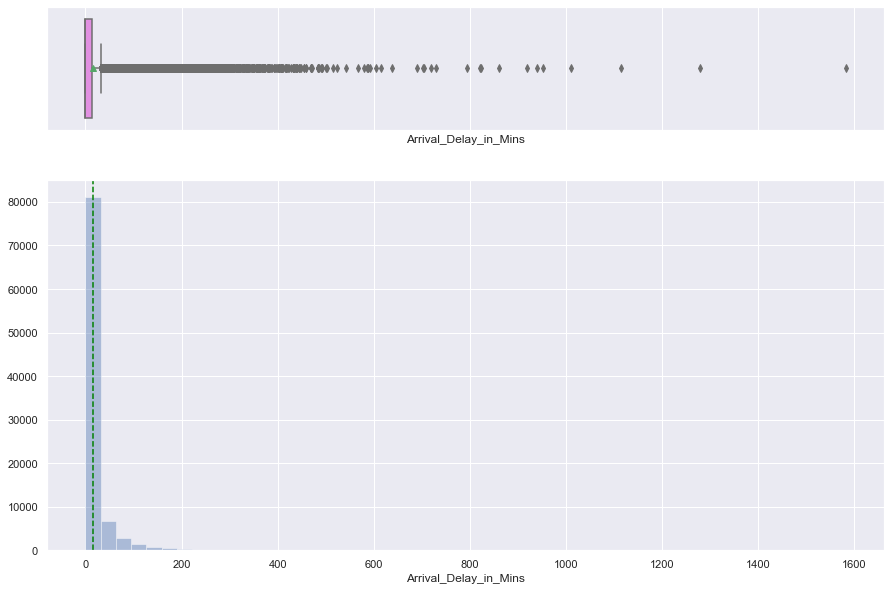

In [78]:
# Build the histogram boxplot for Loan
histogram_boxplot(data_ts['Age'])
histogram_boxplot(data_ts['Travel_Distance'])
histogram_boxplot(data_ts['Departure_Delay_in_Mins'])
histogram_boxplot(data_ts['Arrival_Delay_in_Mins'])


### **2. Univariate Analysis - Categorical Data**

In [79]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

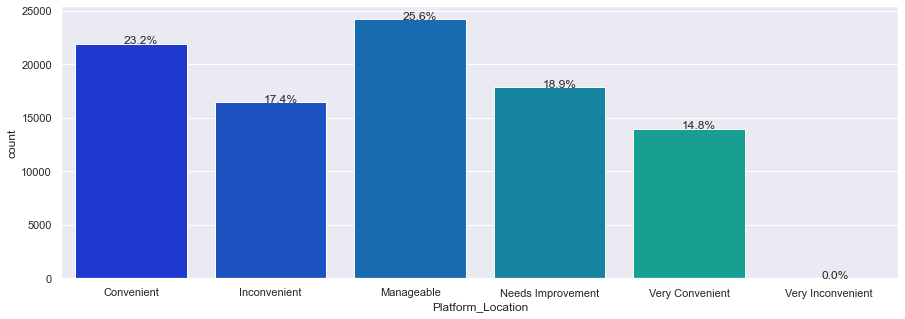

In [80]:


plt.figure(figsize=(15,5))
ax = sns.countplot(data_ts["Platform_Location"],palette='winter')
perc_on_bar(ax,data_ts["Platform_Location"])

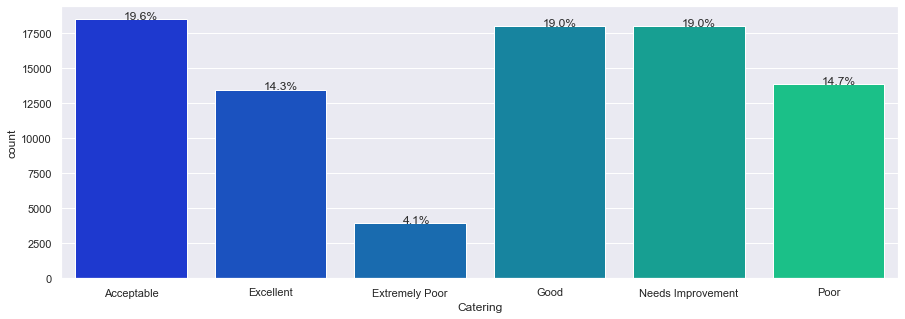

In [81]:

plt.figure(figsize=(15,5))
ax = sns.countplot(data_ts["Catering"],palette='winter')
perc_on_bar(ax,data_ts["Catering"])

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

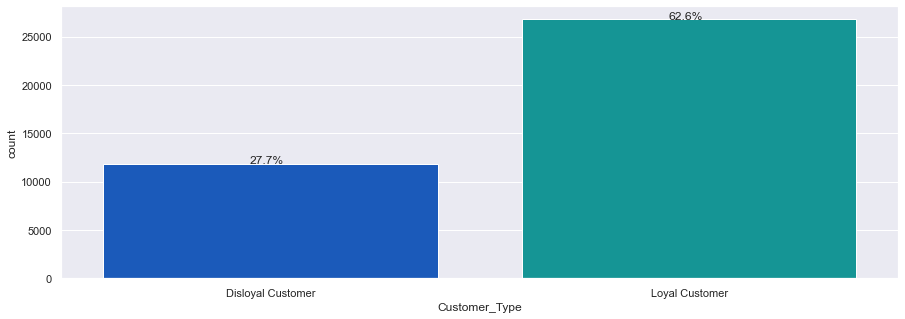

In [82]:
#Build barplot for BAD

#df1 = data.loc[(data['BAD'] == 1) & (data['DEBTINC_missing_values_flag'] == False)]
df1 = data_ts.loc[(data_ts['Overall_Experience'] == 0)]

df2 = df1.groupby(["Customer_Type"])['Customer_Type'].count().to_frame()
df2

plt.figure(figsize=(15,5))
ax = sns.countplot(df1["Customer_Type"],palette='winter')
perc_on_bar(ax,df1["Customer_Type"])

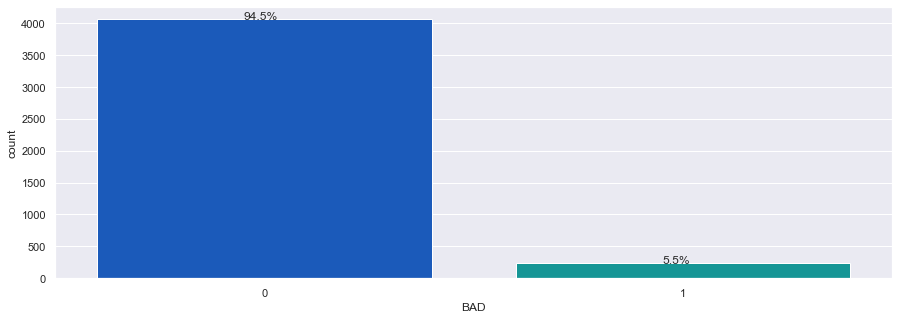

In [217]:
df3 = data.loc[(data['DEBTINC_missing_values_flag'] == False) & (data['DEBTINC'] <= 43.74) & (data['DELINQ'] <= 1)]

plt.figure(figsize=(15,5))
ax = sns.countplot(df3["BAD"],palette='winter')
perc_on_bar(ax,df3["BAD"])

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

<AxesSubplot:xlabel='Overall_Experience', ylabel='Travel_Distance'>

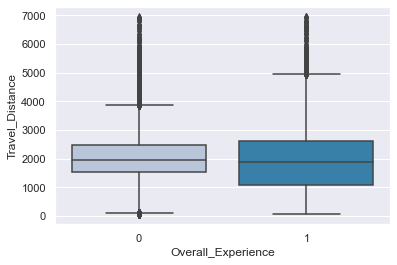

In [89]:
#sns.boxplot(data_ts["Overall_Experience"],data_ts['Age'],palette="PuBu")
sns.boxplot(data_ts["Overall_Experience"],data_ts['Travel_Distance'],palette="PuBu")

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

<AxesSubplot:xlabel='Overall_Experience', ylabel='Age'>

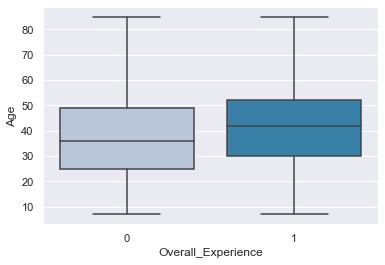

In [90]:
sns.boxplot(data_ts["Overall_Experience"],data_ts['Age'],palette="PuBu")

<AxesSubplot:xlabel='Overall_Experience', ylabel='Departure_Delay_in_Mins'>

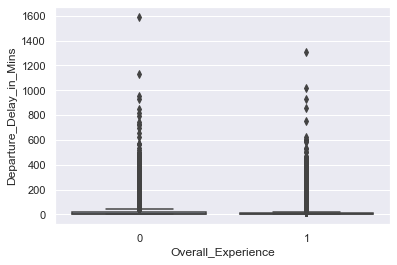

In [91]:
sns.boxplot(data_ts["Overall_Experience"],data_ts['Departure_Delay_in_Mins'],palette="PuBu")

<AxesSubplot:xlabel='Overall_Experience', ylabel='Arrival_Delay_in_Mins'>

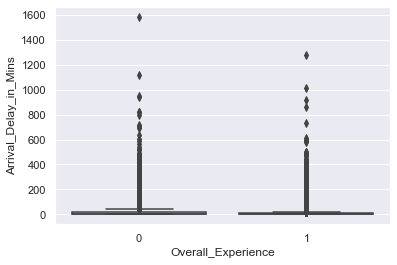

In [92]:
sns.boxplot(data_ts["Overall_Experience"],data_ts['Arrival_Delay_in_Mins'],palette="PuBu")

<AxesSubplot:xlabel='Travel_Distance', ylabel='Cleanliness'>

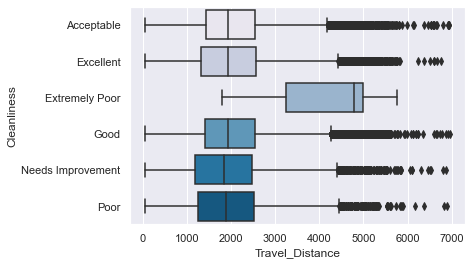

In [94]:
sns.boxplot(data_ts["Travel_Distance"],data_ts['Cleanliness'],palette="PuBu")

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='Age', ylabel='Travel_Distance'>

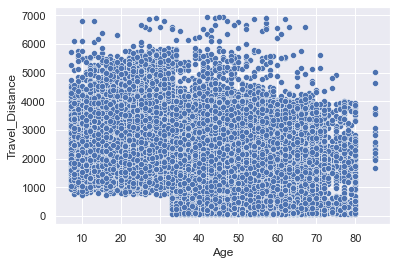

In [95]:
sns.scatterplot(data_ts["Age"],data_ts['Travel_Distance'],palette="PuBu")

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<AxesSubplot:xlabel='Departure_Delay_in_Mins', ylabel='Arrival_Delay_in_Mins'>

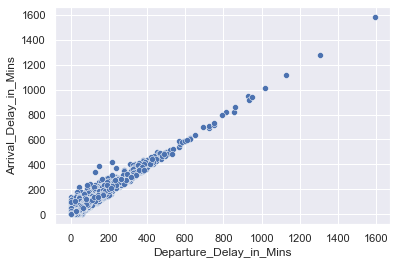

In [97]:
sns.scatterplot(data_ts["Departure_Delay_in_Mins"],data_ts['Arrival_Delay_in_Mins'],palette="PuBu")

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [101]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data_ts['Overall_Experience'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data_ts['Overall_Experience'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(20,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Overall_Experience      0      1    All
Age                                    
7.0                   280    225    505
8.0                   343    229    572
9.0                   381    259    640
10.0                  359    249    608
11.0                  343    268    611
...                   ...    ...    ...
78.0                   20     10     30
79.0                   32      7     39
80.0                   67     21     88
85.0                   12      6     18
All                 42770  51576  94346

[76 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


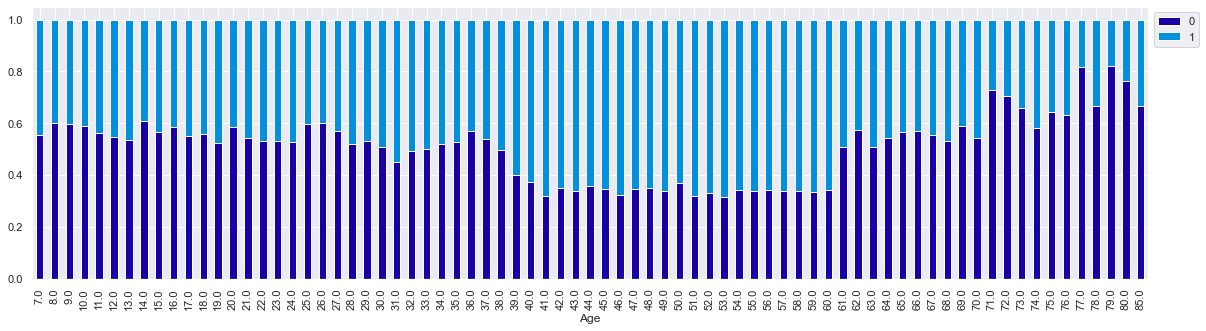

In [102]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data_ts['Age'])

Overall_Experience      0      1    All
Gender                                 
Female              16636  31179  47815
Male                26111  20376  46487
All                 42747  51555  94302
------------------------------------------------------------------------------------------------------------------------


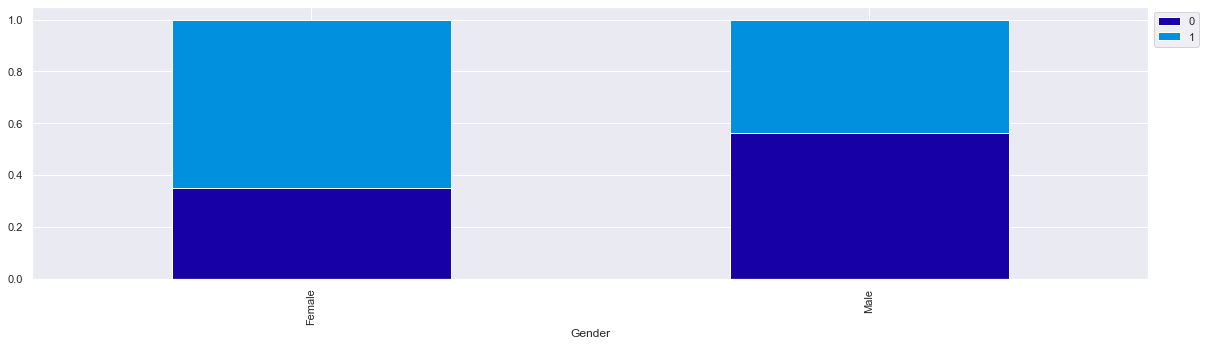

In [190]:
stacked_plot(data_ts['Gender']) # Females more likely to vote satisfied

Overall_Experience      0      1    All
Customer_Type                          
Disloyal Customer   11869   3736  15605
Loyal Customer      26794  43029  69823
All                 38663  46765  85428
------------------------------------------------------------------------------------------------------------------------


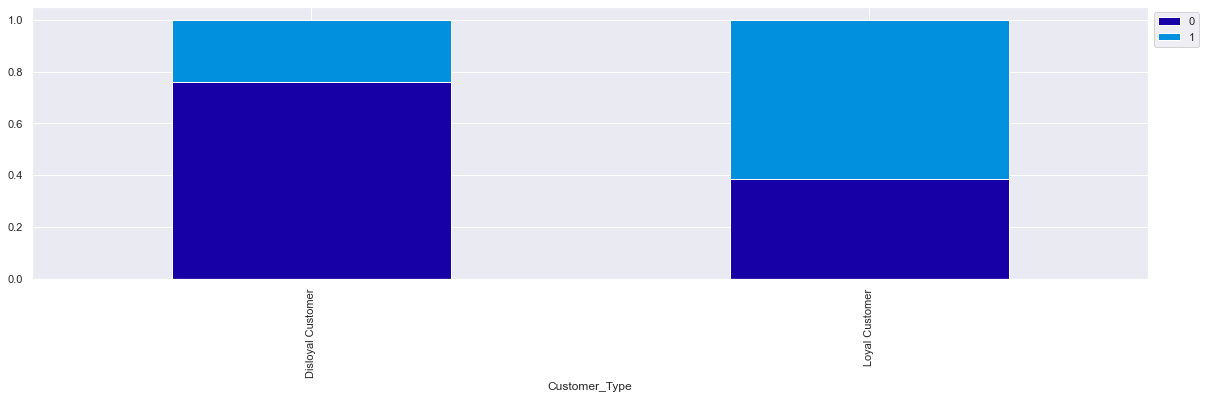

In [105]:
stacked_plot(data_ts['Customer_Type']) #Loyal customers likey to vote satisfied

Overall_Experience      0      1    All
Travel_Class                           
Business            13142  31895  45037
Eco                 29644  19698  49342
All                 42786  51593  94379
------------------------------------------------------------------------------------------------------------------------


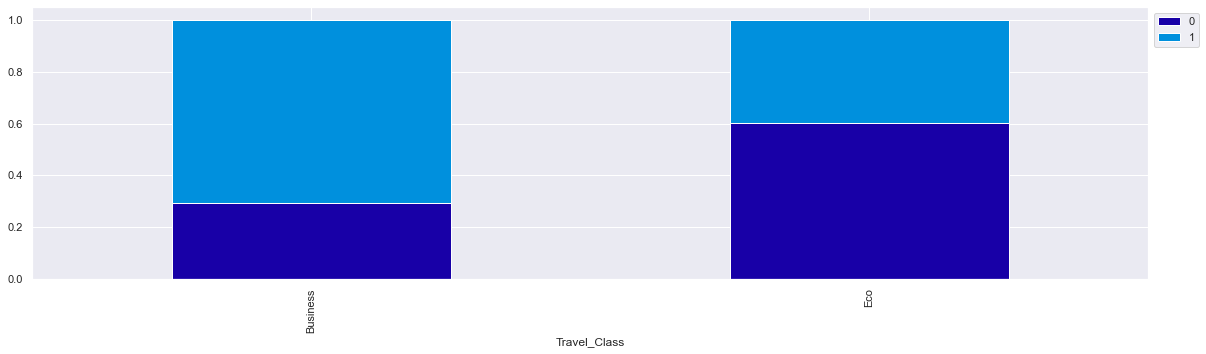

In [106]:
stacked_plot(data_ts['Travel_Class'])  #seems to have no effect

Overall_Experience      0      1    All
Type_Travel                            
Business Travel     24441  34176  58617
Personal Travel     14159  12377  26536
All                 38600  46553  85153
------------------------------------------------------------------------------------------------------------------------


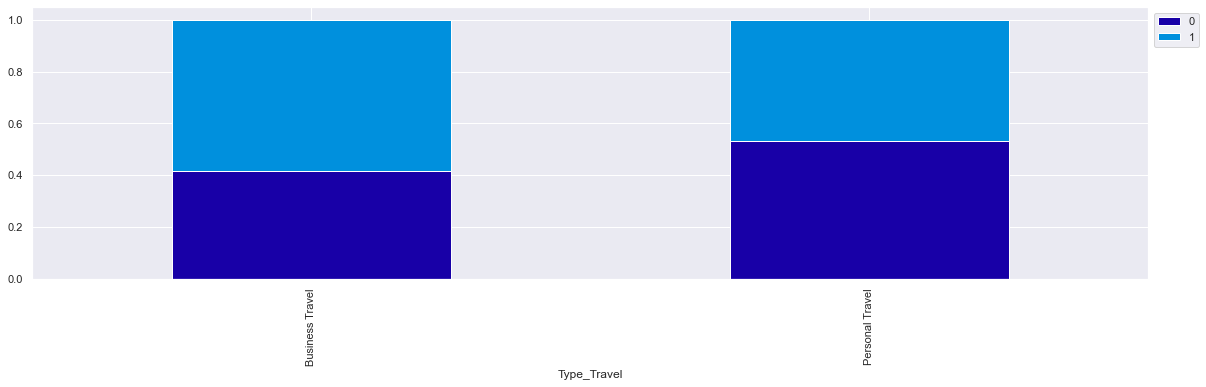

In [191]:
stacked_plot(data_ts['Type_Travel'])

Overall_Experience      0      1    All
Seat_Comfort                           
Acceptable          13669   7489  21158
Excellent              96  12875  12971
Extremely Poor          8   3455   3463
Good                 7181  13414  20595
Needs Improvement   13464   7482  20946
Poor                 8339   6846  15185
All                 42757  51561  94318
------------------------------------------------------------------------------------------------------------------------


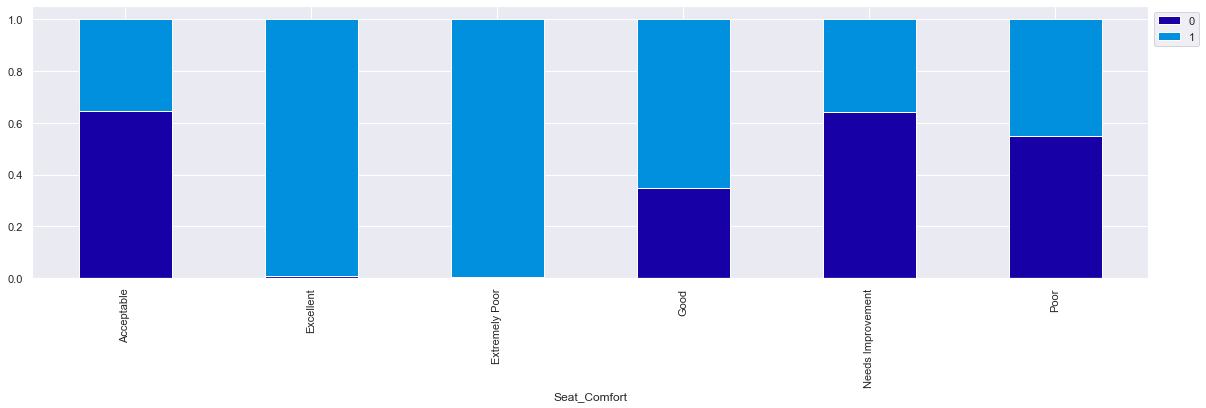

In [107]:
stacked_plot(data_ts['Seat_Comfort'])  #seems to have no effect

Overall_Experience      0      1    All
Seat_Class                             
Green Car           21434  26001  47435
Ordinary            21352  25592  46944
All                 42786  51593  94379
------------------------------------------------------------------------------------------------------------------------


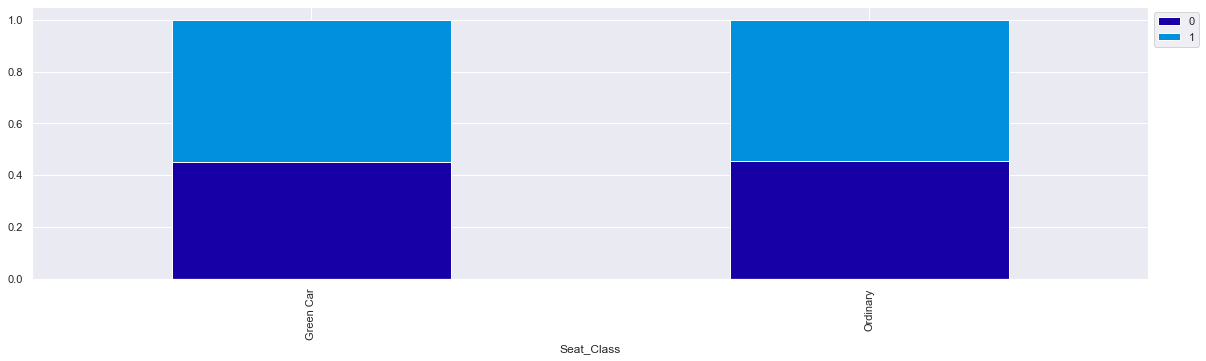

In [108]:
stacked_plot(data_ts['Seat_Class']) #seems to have no effect

Overall_Experience           0      1    All
Arrival_Time_Convenient                     
Acceptable                7050   8127  15177
Excellent                 7866   9818  17684
Extremely Poor            1981   2351   4332
Good                      9307  10267  19574
Needs Improvement         6952   8038  14990
Poor                      5638   8054  13692
All                      38794  46655  85449
------------------------------------------------------------------------------------------------------------------------


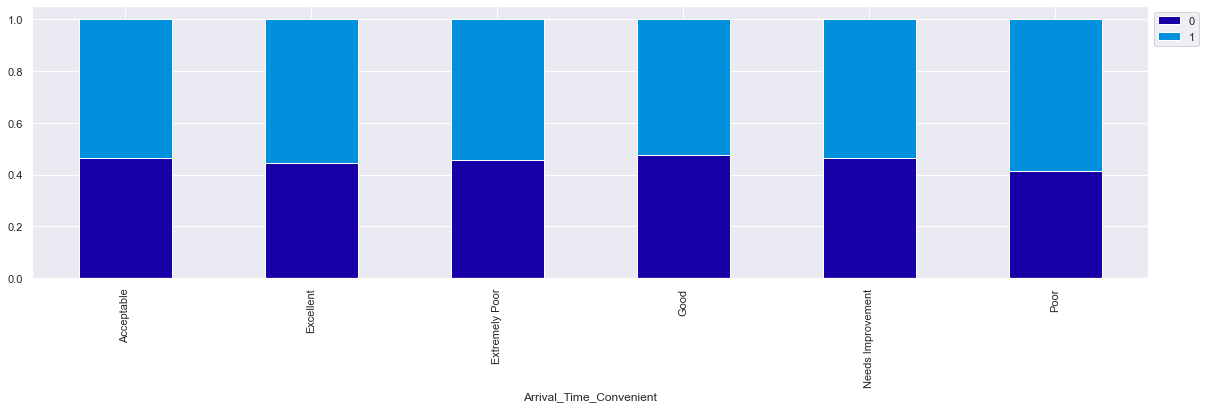

In [109]:
stacked_plot(data_ts['Arrival_Time_Convenient'])  #seems to have no effect

Overall_Experience      0      1    All
Catering                               
Acceptable          10574   7894  18468
Excellent            2945  10510  13455
Extremely Poor        879   3031   3910
Good                 7401  10568  17969
Needs Improvement   10226   7752  17978
Poor                 6814   7044  13858
All                 38839  46799  85638
------------------------------------------------------------------------------------------------------------------------


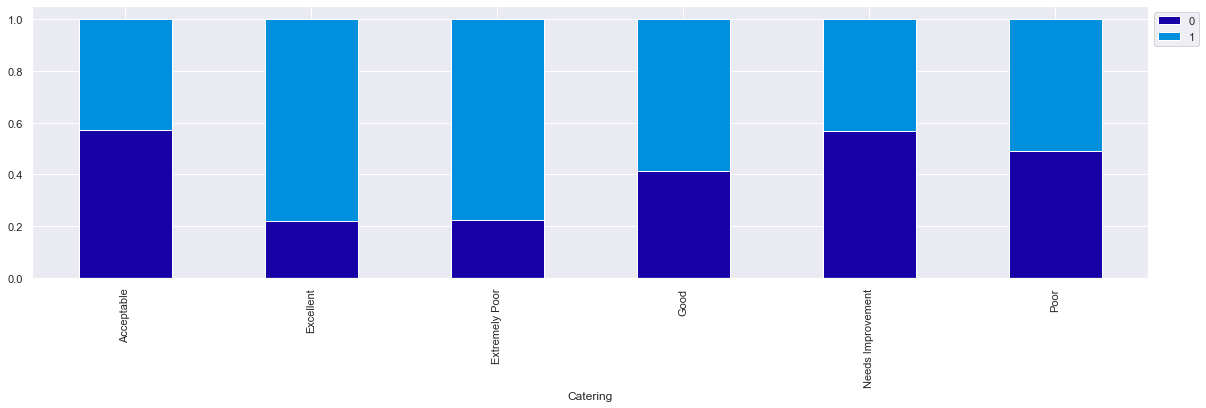

In [110]:
stacked_plot(data_ts['Catering'])  #seems to have no effect

Overall_Experience      0      1    All
Platform_Location                      
Convenient          11009  10903  21912
Inconvenient         6422  10027  16449
Manageable          12985  11188  24173
Needs Improvement    7504  10328  17832
Very Convenient      4853   9128  13981
Very Inconvenient       0      2      2
All                 42773  51576  94349
------------------------------------------------------------------------------------------------------------------------


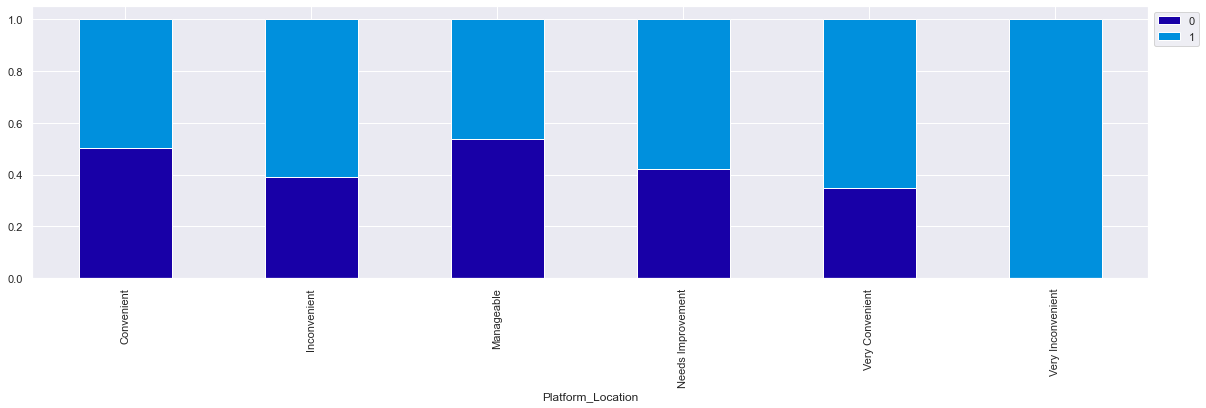

In [111]:
stacked_plot(data_ts['Platform_Location'])  #seems to have no effect

Overall_Experience        0      1    All
Onboard_Wifi_Service                     
Acceptable             9857  10261  20118
Excellent              6950  14018  20968
Extremely Poor           56     35     91
Good                   8235  14600  22835
Needs Improvement      9767   9829  19596
Poor                   7908   2833  10741
All                   42773  51576  94349
------------------------------------------------------------------------------------------------------------------------


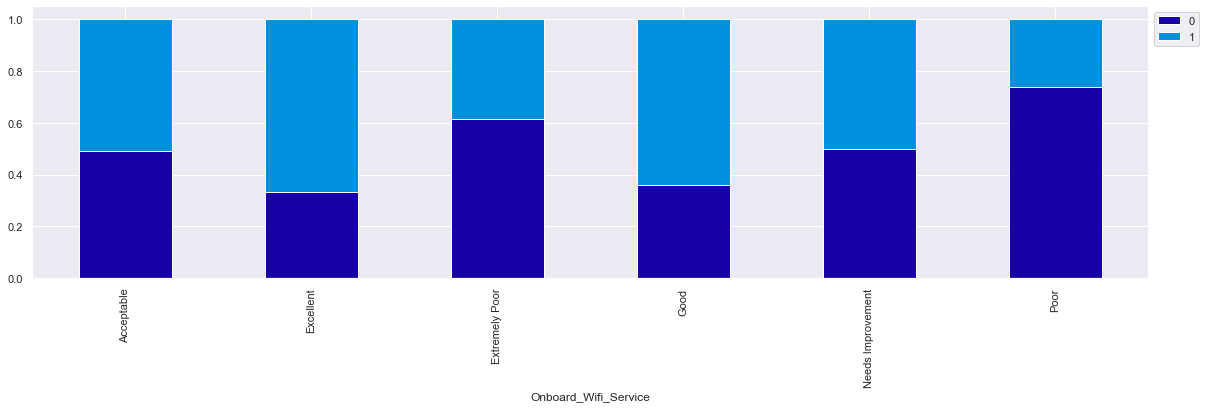

In [112]:
stacked_plot(data_ts['Onboard_Wifi_Service'])  #seems to have direct correlation

Overall_Experience         0      1    All
Onboard_Entertainment                     
Acceptable             14075   3485  17560
Excellent               1022  20622  21644
Extremely Poor           739   1405   2144
Good                    8548  21898  30446
Needs Improvement      11589   2337  13926
Poor                    6805   1836   8641
All                    42778  51583  94361
------------------------------------------------------------------------------------------------------------------------


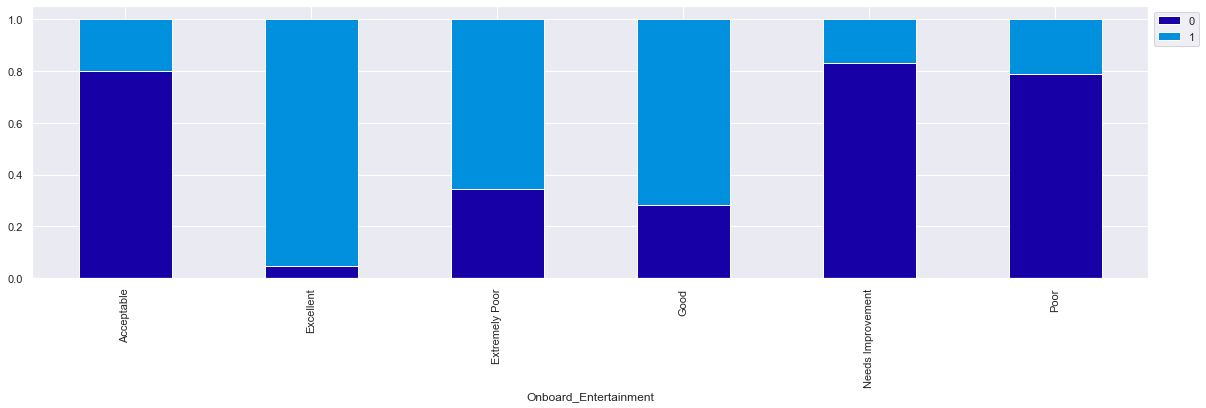

In [117]:
stacked_plot(data_ts['Onboard_Entertainment'])  #seems to have direct correlation

Overall_Experience      0      1    All
Online_Support                         
Acceptable          11300   4402  15702
Excellent            5877  20017  25894
Extremely Poor          1      0      1
Good                 9582  20434  30016
Needs Improvement    8790   3718  12508
Poor                 7205   2962  10167
All                 42755  51533  94288
------------------------------------------------------------------------------------------------------------------------


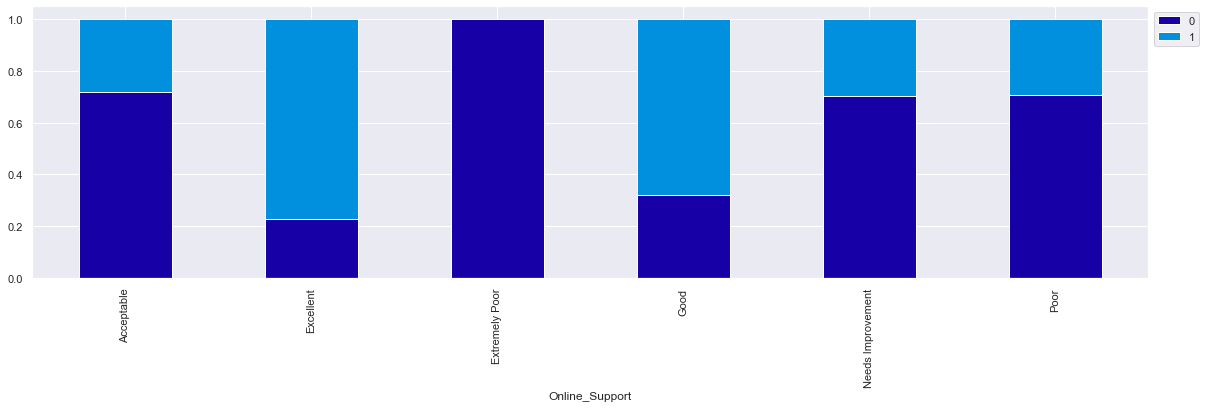

In [119]:
stacked_plot(data_ts['Online_Support'])  #seems to have direct correlation

Overall_Experience          0      1    All
Ease_of_Online_Booking                     
Acceptable              10559   5831  16390
Excellent                5836  18908  24744
Extremely Poor             16      0     16
Good                     8115  20794  28909
Needs Improvement       10347   4132  14479
Poor                     7890   1878   9768
All                     42763  51543  94306
------------------------------------------------------------------------------------------------------------------------


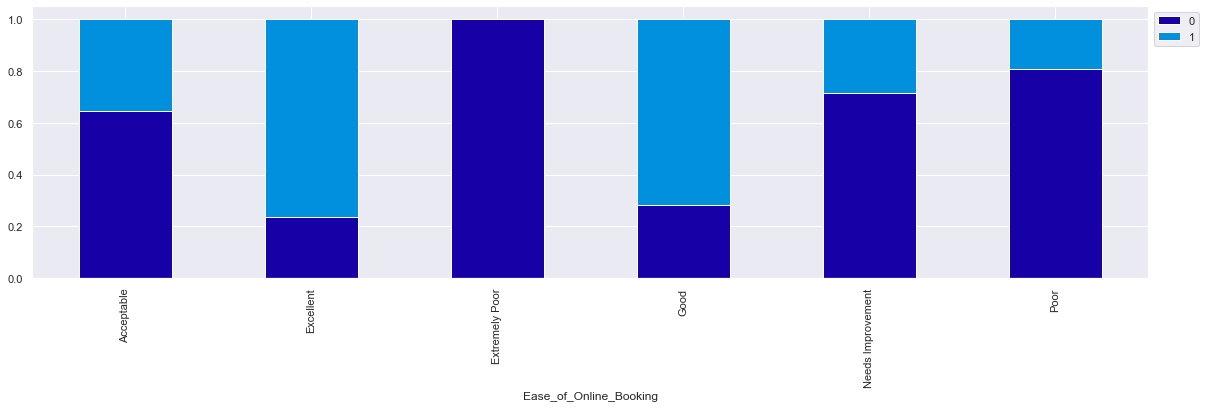

In [120]:
stacked_plot(data_ts['Ease_of_Online_Booking'])  #seems to have very direct correlation

Overall_Experience      0      1    All
Onboard_Service                        
Acceptable          10708   7363  18071
Excellent            5032  16240  21272
Extremely Poor          4      0      4
Good                 9625  17640  27265
Needs Improvement    7547   3843  11390
Poor                 6425   2351   8776
All                 39341  47437  86778
------------------------------------------------------------------------------------------------------------------------


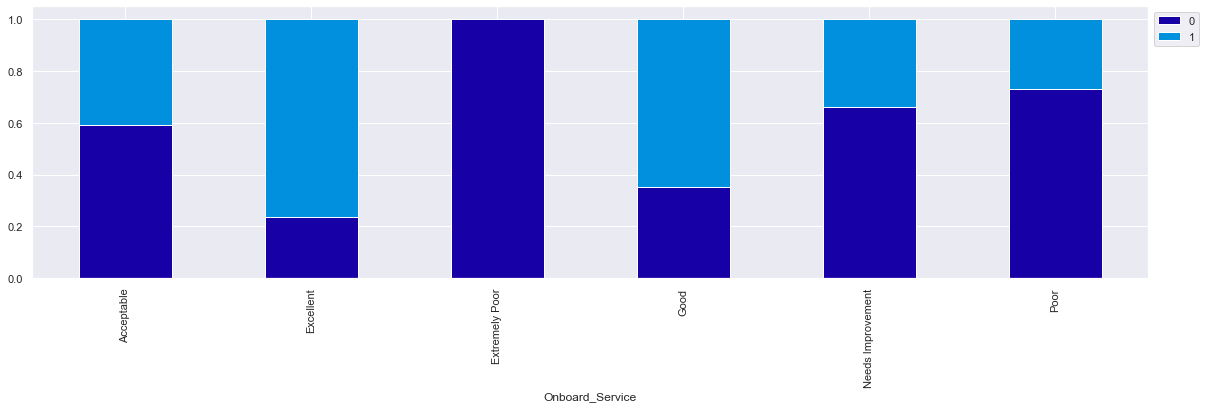

In [121]:
stacked_plot(data_ts['Onboard_Service'])  #seems to have very direct correlation

Overall_Experience      0      1    All
Legroom                                
Acceptable          10321   6063  16384
Excellent            7245  17587  24832
Extremely Poor        106    234    340
Good                 9488  19382  28870
Needs Improvement    9814   5939  15753
Poor                 5776   2334   8110
All                 42750  51539  94289
------------------------------------------------------------------------------------------------------------------------


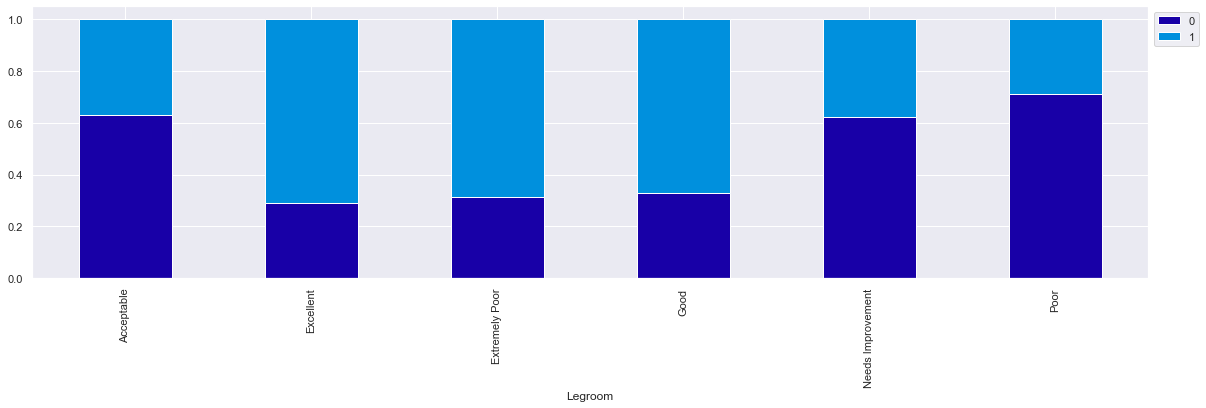

In [122]:
stacked_plot(data_ts['Legroom'])  #seems to have little correlation

Overall_Experience      0      1    All
Baggage_Handling                       
Acceptable          12205   5562  17767
Excellent            6949  19054  26003
Good                14382  20562  34944
Needs Improvement    5875   3884   9759
Poor                 3311   2453   5764
All                 42722  51515  94237
------------------------------------------------------------------------------------------------------------------------


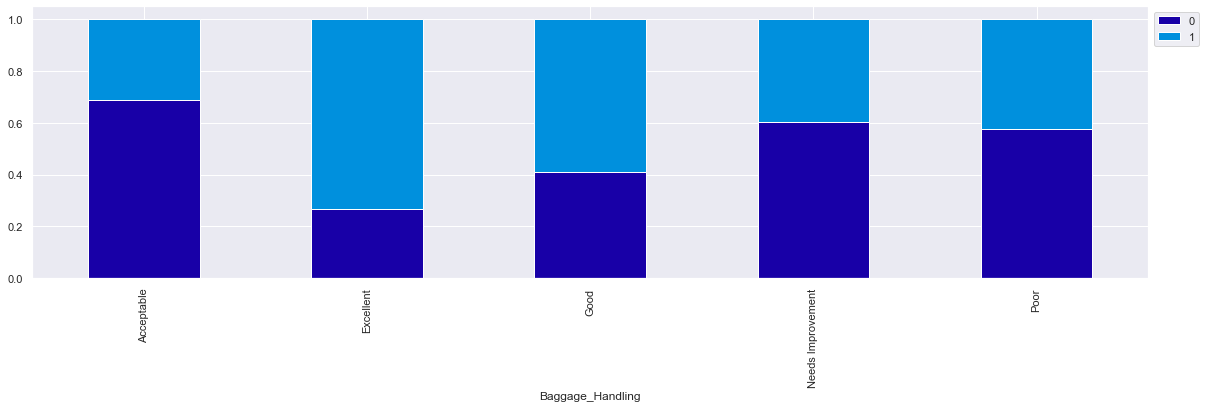

In [123]:
stacked_plot(data_ts['Baggage_Handling'])  #seems to have some correlation

Overall_Experience      0      1    All
CheckIn_Service                        
Acceptable          11194  14609  25803
Excellent            5236  14405  19641
Extremely Poor          1      0      1
Good                11263  15239  26502
Needs Improvement    7484   3734  11218
Poor                 7574   3563  11137
All                 42752  51550  94302
------------------------------------------------------------------------------------------------------------------------


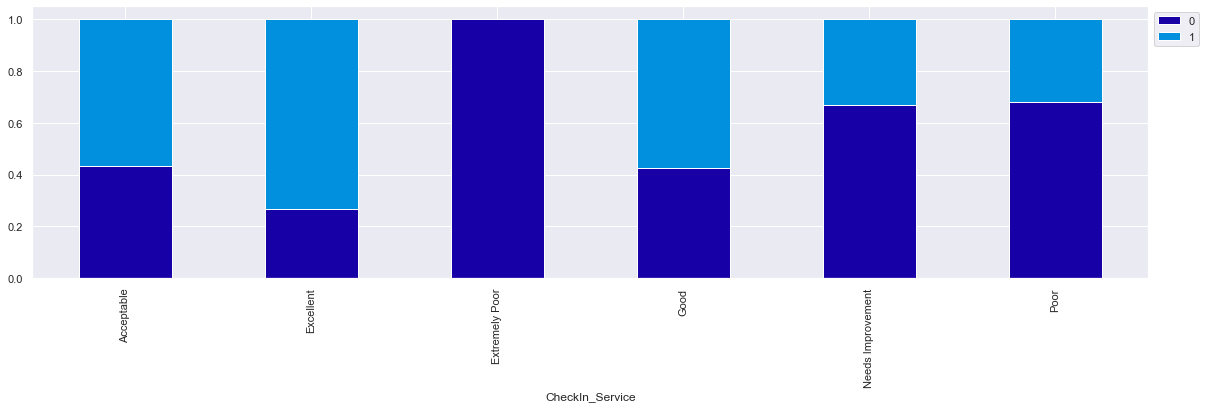

In [124]:
stacked_plot(data_ts['CheckIn_Service'])  #seems to have direct correlation

Overall_Experience      0      1    All
Cleanliness                            
Acceptable          11859   5590  17449
Excellent            7067  18986  26053
Extremely Poor          5      0      5
Good                14678  20749  35427
Needs Improvement    5849   3957   9806
Poor                 3328   2305   5633
All                 42786  51587  94373
------------------------------------------------------------------------------------------------------------------------


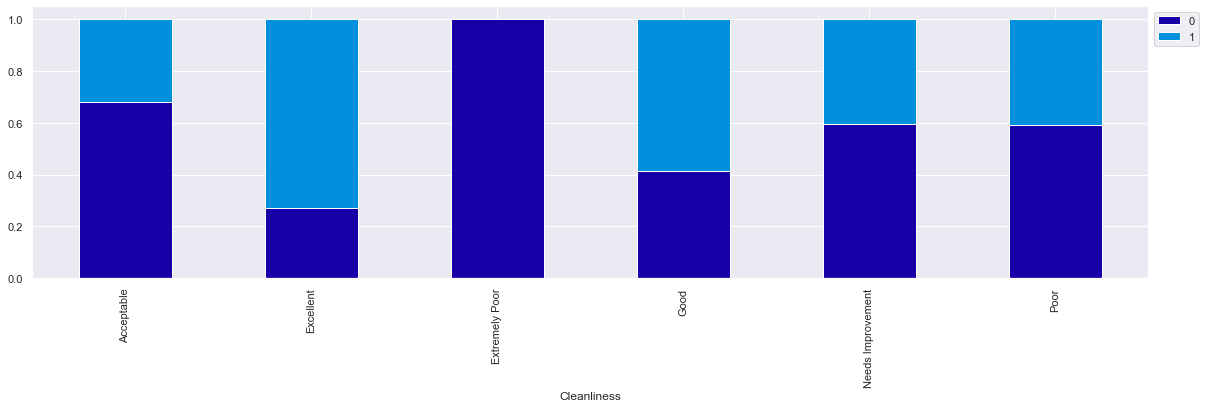

In [125]:
stacked_plot(data_ts['Cleanliness'])  #seems to have direct correlation

Overall_Experience      0      1    All
Online_Boarding                        
Acceptable          10125  12350  22475
Excellent            5857  15885  21742
Extremely Poor         12      0     12
Good                 8869  16664  25533
Needs Improvement    9674   3777  13451
Poor                 8249   2911  11160
All                 42786  51587  94373
------------------------------------------------------------------------------------------------------------------------


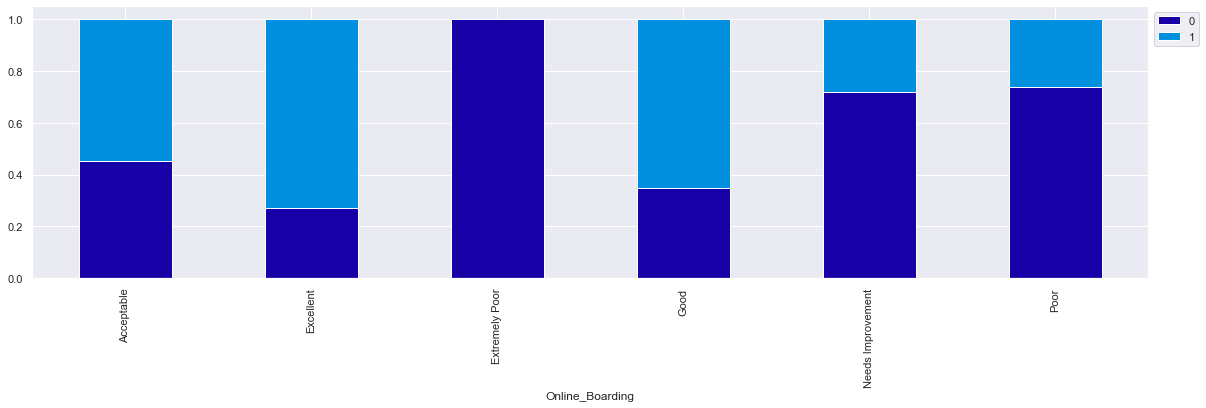

In [126]:
stacked_plot(data_ts['Online_Boarding'])  #seems to have direct correlation

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

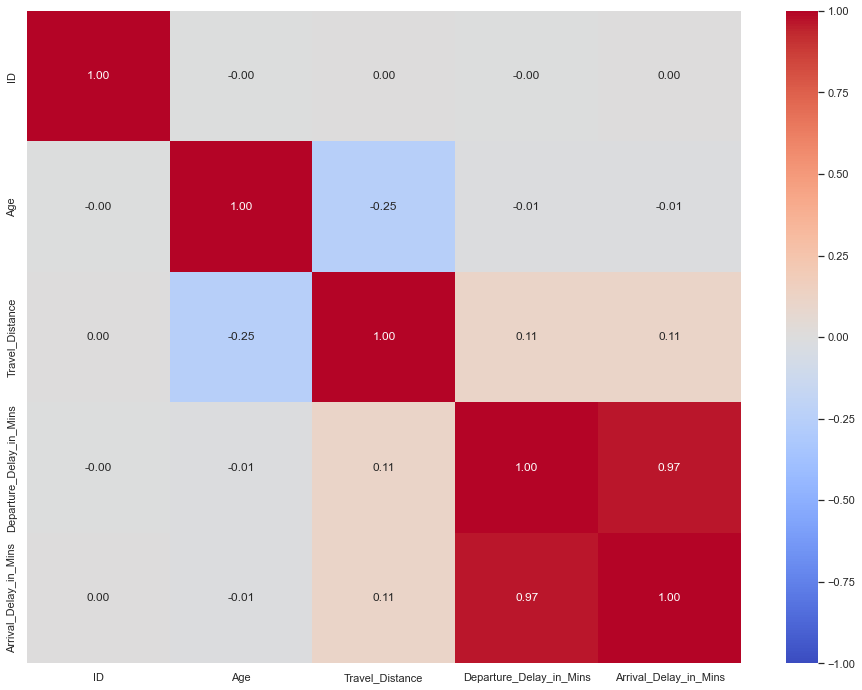

In [127]:
# Separating numerical variables
numerical_col = data_ts.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data_ts[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot = True, cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

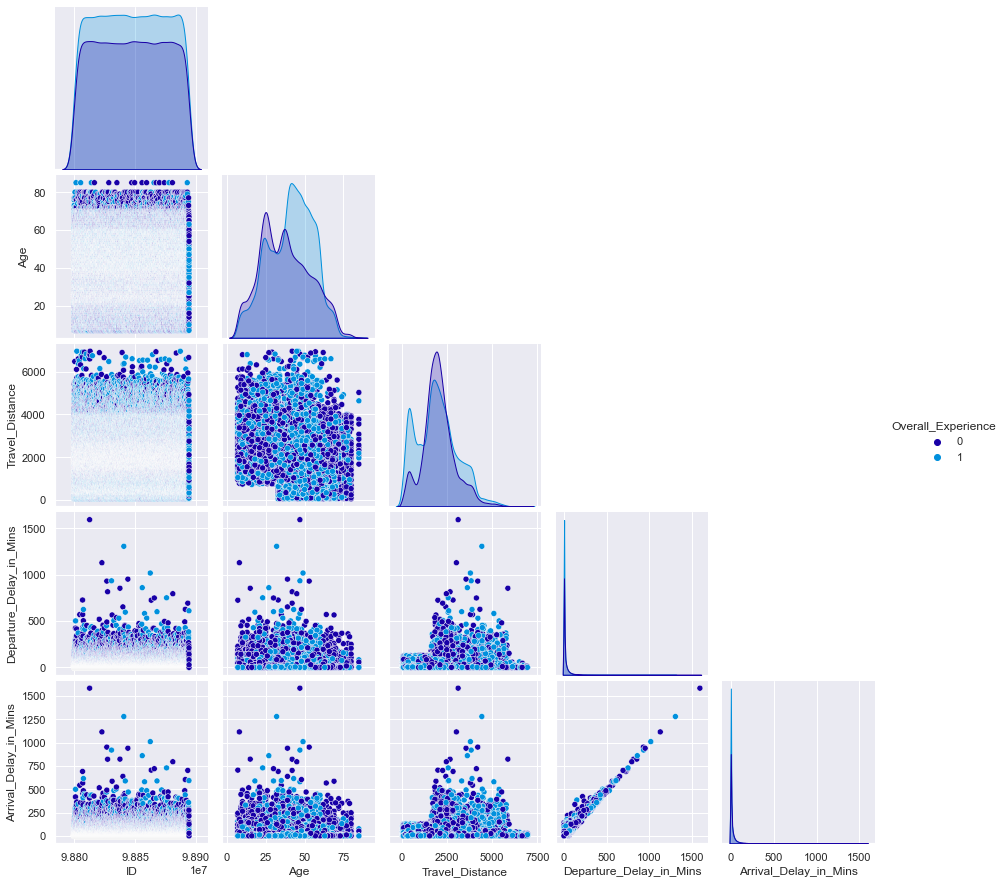

In [129]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data_ts, hue = 'Overall_Experience', corner = True)

plt.show()

#### Treating Outliers

# Missing value treatment for categorical variables 

In [17]:
#True copy of data in data_ts_raw - commented to save it from copying over bad data later

data_ts_raw = data_ts.copy()

In [206]:
# run only when needed
#data_ts = data_ts_raw.copy()

#### Adding new columns in the dataset for each column which has missing values 

In [18]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [19]:
# list of columns that has missing values in it
missing_col = [col for col in data_ts.columns if data_ts[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data_ts,colmn)
    

In [20]:
data_ts

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0      98800001  Female  Loyal Customer  52.0              NaN     Business   
1      98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2      98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3      98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4      98800005  Female  Loyal Customer  50.0  Business Travel     Business   
...         ...     ...             ...   ...              ...          ...   
94374  98894375    Male  Loyal Customer  32.0  Business Travel     Business   
94375  98894376    Male  Loyal Customer  44.0  Business Travel     Business   
94376  98894377    Male             NaN  63.0  Business Travel     Business   
94377  98894378    Male  Loyal Customer  16.0  Personal Travel          Eco   
94378  98894379    Male  Loyal Customer  54.0              NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0                  272                      0.0                    5.0   
1                 2200                      9.0                    0.0   
2                 1061                     77.0                  119.0   
3                  780                     13.0                   18.0   
4                 1981                      0.0                    0.0   
...                ...                      ...                    ...   
94374             1357                     83.0                  125.0   
94375              592                      5.0                   11.0   
94376             2794                      0.0                    0.0   
94377             2744                      0.0                    0.0   
94378             2107                     28.0                   28.0   

      Overall_Experience       Seat_Comfort Seat_Class  \
0                      0  Needs Improvement  Green Car   
1                      0               Poor   Ordinary   
2                      1  Needs Improvement  Green Car   
3                      0         Acceptable   Ordinary   
4                      1         Acceptable   Ordinary   
...                  ...                ...        ...   
94374                  0               Poor   Ordinary   
94375                  1               Good   Ordinary   
94376                  1  Needs Improvement  Green Car   
94377                  0  Needs Improvement   Ordinary   
94378                  0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
0                   Excellent          Excellent    Very Convenient   
1                   Excellent               Poor  Needs Improvement   
2           Needs Improvement  Needs Improvement  Needs Improvement   
3           Needs Improvement                NaN  Needs Improvement   
4                  Acceptable         Acceptable         Manageable   
...                       ...                ...                ...   
94374                    Good               Good         Convenient   
94375                    Good               Good         Convenient   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                     NaN  Needs Improvement         Convenient   
94378                    Poor         Acceptable         Manageable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                     Good     Needs Improvement     Acceptable   
1                     Good                  Poor           Good   
2        Needs Improvement                  Good      Excellent   
3               Acceptable     Needs Improvement     Acceptable   
4        Needs Improvement                  Good      Excellent   
...                    ...                   ...            ...   
94374                 Poor                  Poor           Poor   
94375    Needs Improvement             Excellent      Excellent   
94376                 

#### Filling missing values in category columns with  mode and some custom logic

In [21]:
cat_cols = data_ts.select_dtypes('category').columns.tolist()
cat_cols

for col in cat_cols:
    column_nan = data_ts[col].isnull().any()
    if(column_nan):        
        mode = data_ts[col].mode()[0]
        
        print(col," ", column_nan, " ", mode)
        data_ts[col] = data_ts[col].fillna(mode)

Gender   True   Female
Customer_Type   True   Loyal Customer
Type_Travel   True   Business Travel
Seat_Comfort   True   Acceptable
Arrival_Time_Convenient   True   Good
Catering   True   Acceptable
Platform_Location   True   Manageable
Onboard_Wifi_Service   True   Good
Onboard_Entertainment   True   Good
Online_Support   True   Good
Ease_of_Online_Booking   True   Good
Onboard_Service   True   Good
Legroom   True   Good
Baggage_Handling   True   Good
CheckIn_Service   True   Good
Cleanliness   True   Good
Online_Boarding   True   Good


In [211]:
cat_cols = data_ts.select_dtypes('category').columns.tolist()
cat_cols

df_0 = data_ts.loc[(data_ts['Overall_Experience'] == 0)]
df_1 = data_ts.loc[(data_ts['Overall_Experience'] == 1)]


for col in cat_cols:
    column_nan = data_ts[col].isnull().any()
    if(column_nan):        
        mode_0 = df_0[col].mode()[0]
        mode_1 = df_1[col].mode()[0]
        
        if(col == 'Customer_Type'):
            mode_0 = 'Disloyal Customer'
            
        if(col == 'Ease_of_Online_Booking'):
            mode_0 = 'Needs Improvement'
            
        if(col == 'Baggage_Handling'):
            mode_0 = 'Acceptable'
            
        if(col == 'CheckIn_Service'):
            mode_0 = 'Needs Improvement'
            
        if(col == 'Cleanliness'):
            mode_0 = 'Acceptable'
            
        if(col == 'Online_Boarding'):
            mode_0 = 'Needs Improvement'
        
        print(col," ", column_nan, " ", mode_0, " ", mode_1)
        data_ts.loc[data_ts['Overall_Experience'] == 0, col] = data_ts.loc[data_ts['Overall_Experience'] == 0, col].fillna(mode_0)
        data_ts.loc[data_ts['Overall_Experience'] == 1, col] = data_ts.loc[data_ts['Overall_Experience'] == 1, col].fillna(mode_1)
    
#data_ts[col].isnull().sum()

Gender   True   Male   Female
Customer_Type   True   Disloyal Customer   Loyal Customer
Type_Travel   True   Business Travel   Business Travel
Seat_Comfort   True   Acceptable   Good
Arrival_Time_Convenient   True   Good   Good
Catering   True   Acceptable   Good
Platform_Location   True   Manageable   Manageable
Onboard_Wifi_Service   True   Acceptable   Good
Onboard_Entertainment   True   Acceptable   Good
Online_Support   True   Acceptable   Good
Ease_of_Online_Booking   True   Needs Improvement   Good
Onboard_Service   True   Acceptable   Good
Legroom   True   Acceptable   Good
Baggage_Handling   True   Acceptable   Good
CheckIn_Service   True   Needs Improvement   Good
Cleanliness   True   Acceptable   Good
Online_Boarding   True   Needs Improvement   Good


In [22]:
for col in cat_cols:
    column_nan_test = data_ts[col].isnull().any()
    print(column_nan_test)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [23]:
cat_cols_1= data_ts.select_dtypes(['category'])
for i in cat_cols_1.columns:
    print('Unique values in',i, 'are :')
    print(data_ts[i].value_counts(dropna=False)/data_ts.shape[0]*100)
    print('*'*40)

Unique values in Gender are :
Female    50.744339
Male      49.255661
Name: Gender, dtype: float64
****************************************
Unique values in Customer_Type are :
Loyal Customer       83.465601
Disloyal Customer    16.534399
Name: Customer_Type, dtype: float64
****************************************
Unique values in Type_Travel are :
Business Travel    71.883576
Personal Travel    28.116424
Name: Type_Travel, dtype: float64
****************************************
Unique values in Travel_Class are :
Eco         52.280698
Business    47.719302
Name: Travel_Class, dtype: float64
****************************************
Unique values in Overall_Experience are :
1    54.665763
0    45.334237
Name: Overall_Experience, dtype: float64
****************************************
Unique values in Seat_Comfort are :
Acceptable           22.482756
Needs Improvement    22.193496
Good                 21.821592
Poor                 16.089384
Excellent            13.743523
Extremely Poor 

In [24]:
data_ts

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0      98800001  Female  Loyal Customer  52.0  Business Travel     Business   
1      98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2      98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3      98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4      98800005  Female  Loyal Customer  50.0  Business Travel     Business   
...         ...     ...             ...   ...              ...          ...   
94374  98894375    Male  Loyal Customer  32.0  Business Travel     Business   
94375  98894376    Male  Loyal Customer  44.0  Business Travel     Business   
94376  98894377    Male  Loyal Customer  63.0  Business Travel     Business   
94377  98894378    Male  Loyal Customer  16.0  Personal Travel          Eco   
94378  98894379    Male  Loyal Customer  54.0  Business Travel          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0                  272                      0.0                    5.0   
1                 2200                      9.0                    0.0   
2                 1061                     77.0                  119.0   
3                  780                     13.0                   18.0   
4                 1981                      0.0                    0.0   
...                ...                      ...                    ...   
94374             1357                     83.0                  125.0   
94375              592                      5.0                   11.0   
94376             2794                      0.0                    0.0   
94377             2744                      0.0                    0.0   
94378             2107                     28.0                   28.0   

      Overall_Experience       Seat_Comfort Seat_Class  \
0                      0  Needs Improvement  Green Car   
1                      0               Poor   Ordinary   
2                      1  Needs Improvement  Green Car   
3                      0         Acceptable   Ordinary   
4                      1         Acceptable   Ordinary   
...                  ...                ...        ...   
94374                  0               Poor   Ordinary   
94375                  1               Good   Ordinary   
94376                  1  Needs Improvement  Green Car   
94377                  0  Needs Improvement   Ordinary   
94378                  0         Acceptable   Ordinary   

      Arrival_Time_Convenient           Catering  Platform_Location  \
0                   Excellent          Excellent    Very Convenient   
1                   Excellent               Poor  Needs Improvement   
2           Needs Improvement  Needs Improvement  Needs Improvement   
3           Needs Improvement         Acceptable  Needs Improvement   
4                  Acceptable         Acceptable         Manageable   
...                       ...                ...                ...   
94374                    Good               Good         Convenient   
94375                    Good               Good         Convenient   
94376       Needs Improvement  Needs Improvement  Needs Improvement   
94377                    Good  Needs Improvement         Convenient   
94378                    Poor         Acceptable         Manageable   

      Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                     Good     Needs Improvement     Acceptable   
1                     Good                  Poor           Good   
2        Needs Improvement                  Good      Excellent   
3               Acceptable     Needs Improvement     Acceptable   
4        Needs Improvement                  Good      Excellent   
...                    ...                   ...            ...   
94374                 Poor                  Poor           Poor   
94375    Needs Improvement             Excellent      Excellent   
94376                 

In [25]:
pd.set_option('display.max_columns', None)

data_ts.loc[data_ts['ID'] == 98800232]

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
231  98800232  Female  Loyal Customer  24.0  Personal Travel          Eco   

     Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
231             1711                     10.0                    NaN   

    Overall_Experience       Seat_Comfort Seat_Class Arrival_Time_Convenient  \
231                  1  Needs Improvement  Green Car                    Good   

              Catering  Platform_Location Onboard_Wifi_Service  \
231  Needs Improvement  Needs Improvement                 Good   

    Onboard_Entertainment Online_Support Ease_of_Online_Booking  \
231             Excellent      Excellent              Excellent   

    Onboard_Service    Legroom Baggage_Handling CheckIn_Service Cleanliness  \
231       Excellent  Excellent        Excellent            Good   Excellent   

    Online_Boarding  Gender_missing_values_flag  \
231      Acceptable                       False   

     Customer_Type_missing_values_flag  Age_missing_values_flag  \
231                              False                    False   

     Type_Travel_missing_values_flag  \
231                            False   

     Departure_Delay_in_Mins_missing_values_flag  \
231                                        False   

     Arrival_Delay_in_Mins_missing_values_flag  \
231                                       True   

     Seat_Comfort_missing_values_flag  \
231                             False   

     Arrival_Time_Convenient_missing_values_flag  \
231                                        False   

     Catering_missing_values_flag  Platform_Location_missing_values_flag  \
231                         False                                  False   

     Onboard_Wifi_Service_missing_values_flag  \
231                                     False   

     Onboard_Entertainment_missing_values_flag  \
231                                      False   

     Online_Support_missing_values_flag  \
231                               False   

     Ease_of_Online_Booking_missing_values_flag  \
231                                       False   

     Onboard_Service_missing_values_flag  Legroom_missing_values_flag  \
231                                False                        False   

     Baggage_Handling_missing_values_flag  \
231                                 False   

     CheckIn_Service_missing_values_flag  Cleanliness_missing_values_flag  \
231                                False                            False   

     Online_Boarding_missing_values_flag  
231                                False

# Missing value treatment for numerical columns

In [26]:
num_data = data_ts.select_dtypes('number')
data_ts[num_data.columns] = num_data.fillna(num_data.median())

In [27]:
#Check if there area any null values remaining 
data_ts.isnull().sum()/data_ts.shape[0]*100

ID                                             0.0
Gender                                         0.0
Customer_Type                                  0.0
Age                                            0.0
Type_Travel                                    0.0
Travel_Class                                   0.0
Travel_Distance                                0.0
Departure_Delay_in_Mins                        0.0
Arrival_Delay_in_Mins                          0.0
Overall_Experience                             0.0
Seat_Comfort                                   0.0
Seat_Class                                     0.0
Arrival_Time_Convenient                        0.0
Catering                                       0.0
Platform_Location                              0.0
Onboard_Wifi_Service                           0.0
Onboard_Entertainment                          0.0
Online_Support                                 0.0
Ease_of_Online_Booking                         0.0
Onboard_Service                

In [28]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   ID                                           94379 non-null  int64   
 1   Gender                                       94379 non-null  category
 2   Customer_Type                                94379 non-null  category
 3   Age                                          94379 non-null  float64 
 4   Type_Travel                                  94379 non-null  category
 5   Travel_Class                                 94379 non-null  category
 6   Travel_Distance                              94379 non-null  int64   
 7   Departure_Delay_in_Mins                      94379 non-null  float64 
 8   Arrival_Delay_in_Mins                        94379 non-null  float64 
 9   Overall_Experience                           94379 non-null  

# Ordinal encoding for categorical columns

In [29]:
cat_cols

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Overall_Experience',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [30]:
scale_mapper = {"Extremely Poor":0, "Poor":0.2, "Needs Improvement":0.4, "Acceptable":0.6, "Good":0.8, "Excellent":1.0}
scale_mapper_platform = {"Very Inconvenient":0, "Inconvenient":0.2, "Needs Improvement":0.4, "Manageable":0.6, "Convenient":0.8, "Very Convenient":1.0}
    
data_ts["Platform_Location"] = data_ts["Platform_Location"].replace(scale_mapper_platform)

cat_cols_2 = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service','Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness','Online_Boarding']

for col in cat_cols_2:
    data_ts[col] = data_ts[col].replace(scale_mapper)

In [31]:
data_ts

#data_ts.loc[data_ts['ID'] == 98800032]


ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0      98800001  Female  Loyal Customer  52.0  Business Travel     Business   
1      98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2      98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3      98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4      98800005  Female  Loyal Customer  50.0  Business Travel     Business   
...         ...     ...             ...   ...              ...          ...   
94374  98894375    Male  Loyal Customer  32.0  Business Travel     Business   
94375  98894376    Male  Loyal Customer  44.0  Business Travel     Business   
94376  98894377    Male  Loyal Customer  63.0  Business Travel     Business   
94377  98894378    Male  Loyal Customer  16.0  Personal Travel          Eco   
94378  98894379    Male  Loyal Customer  54.0  Business Travel          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0                  272                      0.0                    5.0   
1                 2200                      9.0                    0.0   
2                 1061                     77.0                  119.0   
3                  780                     13.0                   18.0   
4                 1981                      0.0                    0.0   
...                ...                      ...                    ...   
94374             1357                     83.0                  125.0   
94375              592                      5.0                   11.0   
94376             2794                      0.0                    0.0   
94377             2744                      0.0                    0.0   
94378             2107                     28.0                   28.0   

      Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
0                      0           0.4  Green Car                      1.0   
1                      0           0.2   Ordinary                      1.0   
2                      1           0.4  Green Car                      0.4   
3                      0           0.6   Ordinary                      0.4   
4                      1           0.6   Ordinary                      0.6   
...                  ...           ...        ...                      ...   
94374                  0           0.2   Ordinary                      0.8   
94375                  1           0.8   Ordinary                      0.8   
94376                  1           0.4  Green Car                      0.4   
94377                  0           0.4   Ordinary                      0.8   
94378                  0           0.6   Ordinary                      0.2   

       Catering  Platform_Location  Onboard_Wifi_Service  \
0           1.0                1.0                   0.8   
1           0.2                0.4                   0.8   
2           0.4                0.4                   0.4   
3           0.6                0.4                   0.6   
4           0.6                0.6                   0.4   
...         ...                ...                   ...   
94374       0.8                0.8                   0.2   
94375       0.8                0.8                   0.4   
94376       0.4                0.4                   0.8   
94377       0.4                0.8                   0.8   
94378       0.6                0.6                   0.6   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
0                        0.4             0.6                     0.4   
1                        0.2             0.8                     0.8   
2                        0.8             1.0                     1.0   
3                        0.4             0.6                     0.6   
4                        0.8             1.0                     0.8   
...                      ...             ...                     ...   
94374        

In [32]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   ID                                           94379 non-null  int64   
 1   Gender                                       94379 non-null  category
 2   Customer_Type                                94379 non-null  category
 3   Age                                          94379 non-null  float64 
 4   Type_Travel                                  94379 non-null  category
 5   Travel_Class                                 94379 non-null  category
 6   Travel_Distance                              94379 non-null  int64   
 7   Departure_Delay_in_Mins                      94379 non-null  float64 
 8   Arrival_Delay_in_Mins                        94379 non-null  float64 
 9   Overall_Experience                           94379 non-null  

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation - One hot encoding for non-ordinal categorical variables**

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

get_dummies_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']

data_ts = pd.get_dummies(data = data_ts, columns = get_dummies_cols, drop_first = True)

In [34]:
data_ts

ID   Age  Travel_Distance  Departure_Delay_in_Mins  \
0      98800001  52.0              272                      0.0   
1      98800002  48.0             2200                      9.0   
2      98800003  43.0             1061                     77.0   
3      98800004  44.0              780                     13.0   
4      98800005  50.0             1981                      0.0   
...         ...   ...              ...                      ...   
94374  98894375  32.0             1357                     83.0   
94375  98894376  44.0              592                      5.0   
94376  98894377  63.0             2794                      0.0   
94377  98894378  16.0             2744                      0.0   
94378  98894379  54.0             2107                     28.0   

       Arrival_Delay_in_Mins Overall_Experience  Seat_Comfort  \
0                        5.0                  0           0.4   
1                        0.0                  0           0.2   
2                      119.0                  1           0.4   
3                       18.0                  0           0.6   
4                        0.0                  1           0.6   
...                      ...                ...           ...   
94374                  125.0                  0           0.2   
94375                   11.0                  1           0.8   
94376                    0.0                  1           0.4   
94377                    0.0                  0           0.4   
94378                   28.0                  0           0.6   

       Arrival_Time_Convenient  Catering  Platform_Location  \
0                          1.0       1.0                1.0   
1                          1.0       0.2                0.4   
2                          0.4       0.4                0.4   
3                          0.4       0.6                0.4   
4                          0.6       0.6                0.6   
...                        ...       ...                ...   
94374                      0.8       0.8                0.8   
94375                      0.8       0.8                0.8   
94376                      0.4       0.4                0.4   
94377                      0.8       0.4                0.8   
94378                      0.2       0.6                0.6   

       Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
0                       0.8                    0.4             0.6   
1                       0.8                    0.2             0.8   
2                       0.4                    0.8             1.0   
3                       0.6                    0.4             0.6   
4                       0.4                    0.8             1.0   
...                     ...                    ...             ...   
94374                   0.2                    0.2             0.2   
94375                   0.4                    1.0             1.0   
94376                   0.8                    1.0             0.8   
94377                   0.8                    0.4             0.8   
94378                   0.6                    0.6             0.6   

       Ease_of_Online_Booking  Onboard_Service  Legroom  Baggage_Handling  \
0                         0.4              0.4      0.6               0.4   
1                         0.8              1.0      0.4               0.2   
2                         1.0              1.0      1.0               1.0   
3                         0.6              0.6      0.6               0.6   
4                         0.8              0.8      0.8               0.8   
...                       ...              ...      ...               ...   
94374                     0.2              0.8      0.8               0.8   
94375                     0.6              0.6      0.6               0.6   
94376                     0.8              0.8      0.8               0.8   
94377                     0.8              0.6      0.8    

In [35]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   ID                                           94379 non-null  int64   
 1   Age                                          94379 non-null  float64 
 2   Travel_Distance                              94379 non-null  int64   
 3   Departure_Delay_in_Mins                      94379 non-null  float64 
 4   Arrival_Delay_in_Mins                        94379 non-null  float64 
 5   Overall_Experience                           94379 non-null  category
 6   Seat_Comfort                                 94379 non-null  float64 
 7   Arrival_Time_Convenient                      94379 non-null  float64 
 8   Catering                                     94379 non-null  float64 
 9   Platform_Location                            94379 non-null  

### **Separating the target variable from other variables**

In [36]:
#Drop the ID col as it adds no value

data_ts.drop(["ID"], axis = 1, inplace = True)

# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data_ts.drop(columns = ['Overall_Experience'])
Y = data_ts.Overall_Experience

In [37]:
data_ts
X


Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0      52.0              272                      0.0                    5.0   
1      48.0             2200                      9.0                    0.0   
2      43.0             1061                     77.0                  119.0   
3      44.0              780                     13.0                   18.0   
4      50.0             1981                      0.0                    0.0   
...     ...              ...                      ...                    ...   
94374  32.0             1357                     83.0                  125.0   
94375  44.0              592                      5.0                   11.0   
94376  63.0             2794                      0.0                    0.0   
94377  16.0             2744                      0.0                    0.0   
94378  54.0             2107                     28.0                   28.0   

       Seat_Comfort  Arrival_Time_Convenient  Catering  Platform_Location  \
0               0.4                      1.0       1.0                1.0   
1               0.2                      1.0       0.2                0.4   
2               0.4                      0.4       0.4                0.4   
3               0.6                      0.4       0.6                0.4   
4               0.6                      0.6       0.6                0.6   
...             ...                      ...       ...                ...   
94374           0.2                      0.8       0.8                0.8   
94375           0.8                      0.8       0.8                0.8   
94376           0.4                      0.4       0.4                0.4   
94377           0.4                      0.8       0.4                0.8   
94378           0.6                      0.2       0.6                0.6   

       Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
0                       0.8                    0.4             0.6   
1                       0.8                    0.2             0.8   
2                       0.4                    0.8             1.0   
3                       0.6                    0.4             0.6   
4                       0.4                    0.8             1.0   
...                     ...                    ...             ...   
94374                   0.2                    0.2             0.2   
94375                   0.4                    1.0             1.0   
94376                   0.8                    1.0             0.8   
94377                   0.8                    0.4             0.8   
94378                   0.6                    0.6             0.6   

       Ease_of_Online_Booking  Onboard_Service  Legroom  Baggage_Handling  \
0                         0.4              0.4      0.6               0.4   
1                         0.8              1.0      0.4               0.2   
2                         1.0              1.0      1.0               1.0   
3                         0.6              0.6      0.6               0.6   
4                         0.8              0.8      0.8               0.8   
...                       ...              ...      ...               ...   
94374                     0.2              0.8      0.8               0.8   
94375                     0.6              0.6      0.6               0.6   
94376                     0.8              0.8      0.8               0.8   
94377                     0.8              0.6      0.8               0.8   
94378                     0.6              0.2      0.8               0.8   

       CheckIn_Service  Cleanliness  Online_Boarding  \
0                  0.8          0.4              0.2   
1                  0.4          0.8              0.8   
2                  0.8          1.0              1.0   
3                  0.8          0.6              0.6   
4                  0.8          0.8              0.8   
...                .

### **Splitting the data into 70% train and 30% test set**

In [38]:
# Split the data into training and test set

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

**Observations:**
- The data can be balanced using the class_weight='balanced' while creating the logistic regression model

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

**Model evaluation criterion**
**Accuracy Score:** The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In [39]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [40]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

- **First lets create a simple baseline model to compare with that assigns the majority class for all observations**

In [41]:
print(classification_report(y_train, np.zeros_like(y_train)))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62     29950
           1       0.00      0.00      0.00     36115

    accuracy                           0.45     66065
   macro avg       0.23      0.50      0.31     66065
weighted avg       0.21      0.45      0.28     66065



- **Similarly create a simple baseline model that assigns minority class to all observations**

In [42]:
print(classification_report(y_train, np.ones_like(y_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     29950
           1       0.55      1.00      0.71     36115

    accuracy                           0.55     66065
   macro avg       0.27      0.50      0.35     66065
weighted avg       0.30      0.55      0.39     66065



### **Build a Logistic Regression Model** 

In [145]:
# Defining the Logistic regression model
lg = LogisticRegression(class_weight='balanced') ##added the class_weight parameter to balance the calss weights

#lg = LogisticRegression()
# Fitting the model on the training data 

lg.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     29950
           1       0.82      0.83      0.83     36115

    accuracy                           0.81     66065
   macro avg       0.81      0.81      0.81     66065
weighted avg       0.81      0.81      0.81     66065



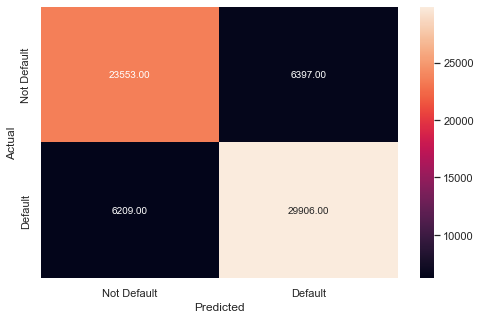

In [44]:
#Predict for train set

y_pred_train = lg.predict(x_train)

#checking the performance on the train dataset

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     12836
           1       0.82      0.83      0.83     15478

    accuracy                           0.81     28314
   macro avg       0.81      0.81      0.81     28314
weighted avg       0.81      0.81      0.81     28314



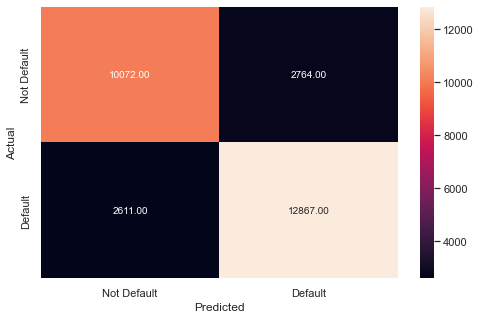

In [45]:
#Predict for test set
y_pred_test = lg.predict(x_test)

#checking the performance on the test dataset

metrics_score(y_test, y_pred_test)

In [46]:
print(y_pred_test)

[1 1 1 ... 1 1 0]


#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [47]:
# Printing the coefficients of logistic regression

cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

0
Onboard_Entertainment                        2.209359
Customer_Type_Loyal Customer                 1.726356
Ease_of_Online_Booking                       1.085257
Seat_Comfort                                 0.829039
Online_Support                               0.719226
Onboard_Service                              0.702862
Legroom                                      0.677187
Online_Boarding                              0.585591
CheckIn_Service                              0.563895
Type_Travel_Personal Travel                  0.175759
Baggage_Handling                             0.107788
Cleanliness                                  0.039660
Online_Boarding_missing_values_flag          0.005022
Cleanliness_missing_values_flag              0.005022
Departure_Delay_in_Mins                      0.002211
Ease_of_Online_Booking_missing_values_flag   0.000708
Legroom_missing_values_flag                  0.000152
Online_Support_missing_values_flag          -0.000111
Travel_Distance                             -0.000320
Onboard_Entertainment_missing_values_flag   -0.000819
Onboard_Wifi_Service_missing_values_flag    -0.001088
Platform_Location_missing_values_flag       -0.001088
Seat_Comfort_missing_values_flag            -0.001853
Departure_Delay_in_Mins_missing_values_flag -0.002296
Age_missing_values_flag                     -0.003459
CheckIn_Service_missing_values_flag         -0.004877
Baggage_Handling_missing_values_flag        -0.005207
Arrival_Delay_in_Mins                       -0.007566
Gender_missing_values_flag                  -0.009620
Arrival_Delay_in_Mins_missing_values_flag   -0.012037
Age                                         -0.021963
Arrival_Time_Convenient_missing_values_flag -0.035565
Catering_missing_values_flag                -0.098968
Onboard_Service_missing_values_flag         -0.155635
Onboard_Wifi_Service                        -0.179470
Type_Travel_missing_values_flag             -0.246883
Customer_Type_missing_values_flag           -0.270587
Seat_Class_Ordinary                         -0.311552
Catering                                    -0.322065
Arrival_Time_Convenient                     -0.878953
Platform_Location                           -0.953697
Gender_Male                                 -1.359110
Travel_Class_Eco                            -1.670987

**The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential**

In [48]:
odds = np.exp(lg.coef_[0]) # Finding the odds. ADEL: That's not the odds 
# but the change in odds for one unit change in the predictor also called odds ratio

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds_ratio']).sort_values(by = 'odds_ratio', ascending = False) 

odds_ratio
Onboard_Entertainment                          9.109877
Customer_Type_Loyal Customer                   5.620139
Ease_of_Online_Booking                         2.960201
Seat_Comfort                                   2.291116
Online_Support                                 2.052844
Onboard_Service                                2.019525
Legroom                                        1.968333
Online_Boarding                                1.796052
CheckIn_Service                                1.757505
Type_Travel_Personal Travel                    1.192151
Baggage_Handling                               1.113812
Cleanliness                                    1.040457
Online_Boarding_missing_values_flag            1.005035
Cleanliness_missing_values_flag                1.005035
Departure_Delay_in_Mins                        1.002214
Ease_of_Online_Booking_missing_values_flag     1.000708
Legroom_missing_values_flag                    1.000152
Online_Support_missing_values_flag             0.999889
Travel_Distance                                0.999680
Onboard_Entertainment_missing_values_flag      0.999181
Onboard_Wifi_Service_missing_values_flag       0.998912
Platform_Location_missing_values_flag          0.998912
Seat_Comfort_missing_values_flag               0.998149
Departure_Delay_in_Mins_missing_values_flag    0.997706
Age_missing_values_flag                        0.996547
CheckIn_Service_missing_values_flag            0.995135
Baggage_Handling_missing_values_flag           0.994807
Arrival_Delay_in_Mins                          0.992463
Gender_missing_values_flag                     0.990426
Arrival_Delay_in_Mins_missing_values_flag      0.988035
Age                                            0.978276
Arrival_Time_Convenient_missing_values_flag    0.965060
Catering_missing_values_flag                   0.905772
Onboard_Service_missing_values_flag            0.855872
Onboard_Wifi_Service                           0.835713
Type_Travel_missing_values_flag                0.781232
Customer_Type_missing_values_flag              0.762932
Seat_Class_Ordinary                            0.732310
Catering                                       0.724651
Arrival_Time_Convenient                        0.415217
Platform_Location                              0.385314
Gender_Male                                    0.256889
Travel_Class_Eco                               0.188061

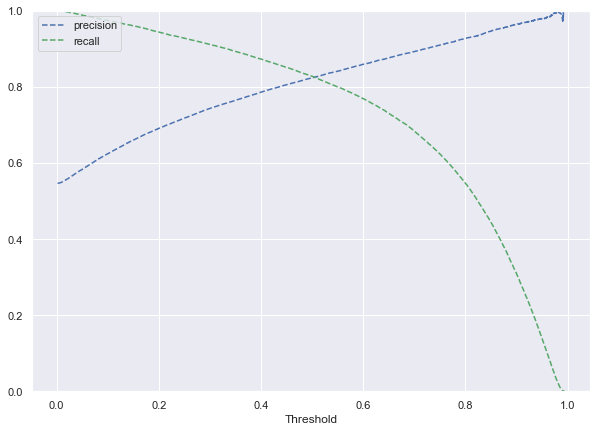

In [49]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     29950
           1       0.82      0.83      0.83     36115

    accuracy                           0.81     66065
   macro avg       0.81      0.81      0.81     66065
weighted avg       0.81      0.81      0.81     66065



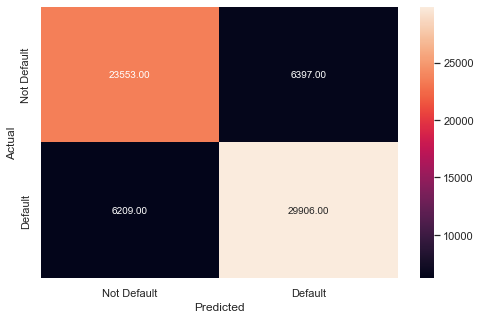

In [50]:
# Train data with Threshold=0.6

optimal_threshold1 = .5
y_pred_train_0 = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train_0[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     12836
           1       0.82      0.83      0.83     15478

    accuracy                           0.81     28314
   macro avg       0.81      0.81      0.81     28314
weighted avg       0.81      0.81      0.81     28314



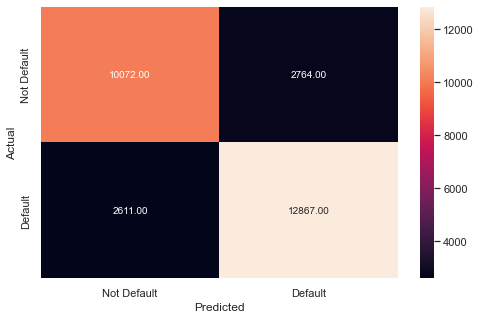

In [51]:
# Test data with Threshold=0.6

optimal_threshold1 = .5
y_pred_test_0 = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test_0[:, 1] > optimal_threshold1)

### **Build a Decision Tree Model**

#### Data Preparation for the tree based model

In [286]:
pd.set_option('display.max_columns', 500)
data_ts

Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0      52.0              272                      0.0                    5.0   
1      48.0             2200                      9.0                    0.0   
2      43.0             1061                     77.0                  119.0   
3      44.0              780                     13.0                   18.0   
4      50.0             1981                      0.0                    0.0   
...     ...              ...                      ...                    ...   
94374  32.0             1357                     83.0                  125.0   
94375  44.0              592                      5.0                   11.0   
94376  63.0             2794                      0.0                    0.0   
94377  16.0             2744                      0.0                    0.0   
94378  54.0             2107                     28.0                   28.0   

      Overall_Experience  Seat_Comfort  Arrival_Time_Convenient  Catering  \
0                      0           0.4                      1.0       1.0   
1                      0           0.2                      1.0       0.2   
2                      1           0.4                      0.4       0.4   
3                      0           0.6                      0.4       0.6   
4                      1           0.6                      0.6       0.6   
...                  ...           ...                      ...       ...   
94374                  0           0.2                      0.8       0.8   
94375                  1           0.8                      0.8       0.8   
94376                  1           0.4                      0.4       0.4   
94377                  0           0.4                      0.8       0.4   
94378                  0           0.6                      0.2       0.6   

       Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
0                    1.0                   0.8                    0.4   
1                    0.4                   0.8                    0.2   
2                    0.4                   0.4                    0.8   
3                    0.4                   0.6                    0.4   
4                    0.6                   0.4                    0.8   
...                  ...                   ...                    ...   
94374                0.8                   0.2                    0.2   
94375                0.8                   0.4                    1.0   
94376                0.4                   0.8                    1.0   
94377                0.8                   0.8                    0.4   
94378                0.6                   0.6                    0.6   

       Online_Support  Ease_of_Online_Booking  Onboard_Service  Legroom  \
0                 0.6                     0.4              0.4      0.6   
1                 0.8                     0.8              1.0      0.4   
2                 1.0                     1.0              1.0      1.0   
3                 0.6                     0.6              0.6      0.6   
4                 1.0                     0.8              0.8      0.8   
...               ...                     ...              ...      ...   
94374             0.2                     0.2              0.8      0.8   
94375             1.0                     0.6              0.6      0.6   
94376             0.8                     0.8              0.8      0.8   
94377             0.8                     0.8              0.6      0.8   
94378             0.6                     0.6              0.2      0.8   

       Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  \
0                   0.4              0.8          0.4              0.2   
1                   0.2              0.4          0.8              0.8   
2                   1.0              0.8          1.0              1.0   
3                   0.6              0.8        

#### Split the data

In [52]:
#Checking the shape of the train and test data

print("Shape of the training set: ", x_train.shape)   

print("Shape of the test set: ", x_test.shape)

print("Percentage of classes in the training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test.value_counts(normalize = True))

Shape of the training set:  (66065, 43)
Shape of the test set:  (28314, 43)
Percentage of classes in the training set:
1    0.546659
0    0.453341
Name: Overall_Experience, dtype: float64
Percentage of classes in the test set:
1    0.546655
0    0.453345
Name: Overall_Experience, dtype: float64


In [53]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree = DecisionTreeClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 7)

In [54]:
x_train

Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
90112  49.0             2023                     64.0                   56.0   
54258  45.0             4879                    160.0                  146.0   
58136  25.0             3779                      0.0                    0.0   
23288  21.0             1928                      0.0                   20.0   
31834  35.0             2331                      2.0                    1.0   
...     ...              ...                      ...                    ...   
7580   57.0              741                     12.0                    0.0   
86702  34.0               87                      0.0                    0.0   
36613  54.0               62                      0.0                    0.0   
529    35.0             1227                     14.0                   14.0   
68264  41.0              530                      7.0                    5.0   

       Seat_Comfort  Arrival_Time_Convenient  Catering  Platform_Location  \
90112           0.2                      0.2       0.4                0.2   
54258           0.6                      1.0       1.0                1.0   
58136           0.6                      0.2       0.2                0.2   
23288           1.0                      1.0       1.0                0.8   
31834           0.4                      0.4       0.4                0.6   
...             ...                      ...       ...                ...   
7580            0.8                      0.8       0.6                0.8   
86702           0.4                      0.4       0.4                0.4   
36613           0.6                      0.6       0.6                0.6   
529             0.2                      0.6       0.6                0.6   
68264           0.4                      0.8       0.6                0.8   

       Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
90112                   0.8                    0.8             1.0   
54258                   0.6                    0.6             0.6   
58136                   0.6                    0.6             0.6   
23288                   0.4                    1.0             0.4   
31834                   1.0                    0.4             1.0   
...                     ...                    ...             ...   
7580                    0.6                    0.8             1.0   
86702                   0.8                    1.0             0.6   
36613                   1.0                    0.6             1.0   
529                     1.0                    0.8             0.8   
68264                   1.0                    0.8             0.8   

       Ease_of_Online_Booking  Onboard_Service  Legroom  Baggage_Handling  \
90112                     1.0              1.0      1.0               1.0   
54258                     0.2              0.2      0.6               0.6   
58136                     0.6              0.8      1.0               0.6   
23288                     0.4              0.6      0.2               0.8   
31834                     1.0              0.6      0.6               0.6   
...                       ...              ...      ...               ...   
7580                      0.8              0.8      0.8               0.8   
86702                     0.8              0.8      0.8               0.6   
36613                     0.4              0.4      0.6               0.4   
529                       0.2              0.2      0.2               0.2   
68264                     0.4              0.8      0.4               0.4   

       CheckIn_Service  Cleanliness  Online_Boarding  \
90112              1.0          1.0              1.0   
54258              0.6          0.8              0.6   
58136              0.4          0.6              0.6   
23288              0.6          0.2              0.4   
31834              0.6          0.6              1.0   
...                .

In [291]:
X.head(10)

Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0  52.0              272                      0.0                    5.0   
1  48.0             2200                      9.0                    0.0   
2  43.0             1061                     77.0                  119.0   
3  44.0              780                     13.0                   18.0   
4  50.0             1981                      0.0                    0.0   
5  44.0             2810                      0.0                    0.0   
6  56.0             2029                      0.0                    0.0   
7  65.0              853                      0.0                    3.0   
8  22.0             1636                      1.0                    0.0   
9  57.0              306                      0.0                    0.0   

   Seat_Comfort  Arrival_Time_Convenient  Catering  Platform_Location  \
0           0.4                      1.0       1.0                1.0   
1           0.2                      1.0       0.2                0.4   
2           0.4                      0.4       0.4                0.4   
3           0.6                      0.4       0.6                0.4   
4           0.6                      0.6       0.6                0.6   
5           0.4                      0.4       0.6                0.4   
6           0.8                      1.0       0.8                0.2   
7           0.6                      0.8       0.6                0.2   
8           0.4                      0.4       0.4                0.4   
9           0.4                      0.8       0.8                0.8   

   Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
0                   0.8                    0.4             0.6   
1                   0.8                    0.2             0.8   
2                   0.4                    0.8             1.0   
3                   0.6                    0.4             0.6   
4                   0.4                    0.8             1.0   
5                   0.8                    1.0             0.8   
6                   0.8                    0.8             0.8   
7                   1.0                    1.0             0.8   
8                   0.6                    0.4             0.6   
9                   0.6                    0.8             0.8   

   Ease_of_Online_Booking  Onboard_Service  Legroom  Baggage_Handling  \
0                     0.4              0.4      0.6               0.4   
1                     0.8              1.0      0.4               0.2   
2                     1.0              1.0      1.0               1.0   
3                     0.6              0.6      0.6               0.6   
4                     0.8              0.8      0.8               0.8   
5                     0.6              0.6      0.8               0.6   
6                     0.8              0.8      1.0               0.4   
7                     0.8              0.8      0.6               0.8   
8                     0.6              0.6      0.6               0.4   
9                     0.4              0.4      0.4               0.4   

   CheckIn_Service  Cleanliness  Online_Boarding  Gender_missing_values_flag  \
0              0.8          0.4              0.2                       False   
1              0.4          0.8              0.8                       False   
2              0.8          1.0              1.0                       False   
3              0.8          0.6              0.6                       False   
4              0.8          0.8              0.8                       False   
5              0.6          0.6              0.6                       False   
6              1.0          0.6              0.8                       False   
7              0.8          0.8              1.0                       False   
8              0.6          0.4              0.6                       False   
9              0.6          0.4 

In [55]:
#fitting Decision tree model
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



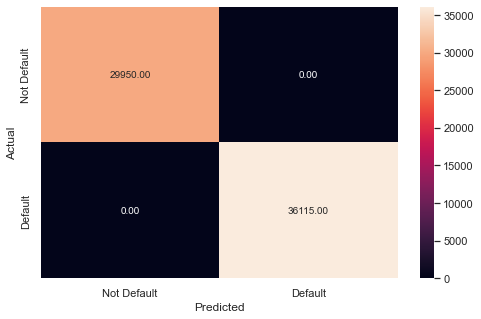

In [56]:
# Checking performance on the training data

y_pred_train_1 = d_tree.predict(x_train)
metrics_score(y_train, y_pred_train_1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12836
           1       0.93      0.94      0.93     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



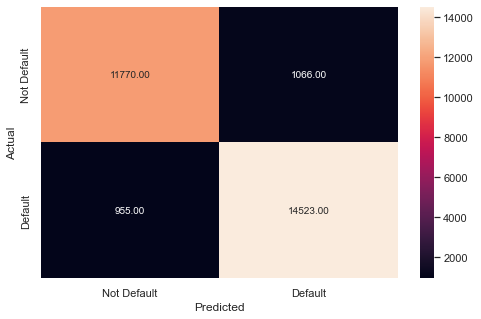

In [57]:
# Checking performance on the testing data

y_pred_test_1 = d_tree.predict(x_test)
metrics_score(y_test, y_pred_test_1)

In [302]:
Y.head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    0
Name: Overall_Experience, dtype: category
Categories (2, int64): [0, 1]

**Before tuning a decision tree, lets get information on the fully grown tree in order to avoid pruning it too aggressively**

In [303]:
d_tree.get_depth(), d_tree.tree_.n_leaves, d_tree.tree_.node_count

(34, 3293, 6585)

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
# Choose the type of classifier. 

d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

# Grid of parameters to choose from

#parameters = {'max_depth': np.arange(2, 8), 
#              'criterion': ['gini', 'entropy'],
#              'min_samples_leaf': [5, 10, 20, 25]
#             }

parameters = {'max_depth': np.arange(2, 30), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25],
              'max_leaf_nodes': [2, 3, 5, 10, 15],
              'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset

grid_obj = grid_obj.fit(x_train, y_train)


# Set the clf to the best combination of parameters

d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

d_tree_tuned.fit(x_train, y_train)

In [147]:
# Choose the type of classifier. 

d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

# Grid of parameters to choose from

#parameters = {'max_depth': np.arange(2, 8), 
#              'criterion': ['gini', 'entropy'],
#              'min_samples_leaf': [5, 10, 20, 25]
#             }

parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [0, 20, 25],
              'max_leaf_nodes': [5, 10, 15],
              'min_impurity_decrease': [0.0001, 0.001]
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset

grid_obj = grid_obj.fit(x_train, y_train)


# Set the clf to the best combination of parameters

d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=20, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     34229
           1       0.81      0.98      0.88     41274

    accuracy                           0.86     75503
   macro avg       0.89      0.85      0.85     75503
weighted avg       0.88      0.86      0.86     75503



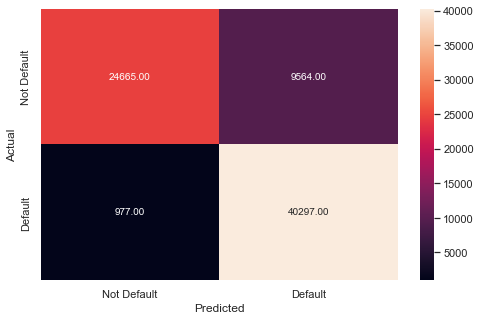

In [149]:
# Checking performance on the training data based on the tuned model

y_pred_train_2 = d_tree_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.96      0.71      0.82      8557
           1       0.80      0.98      0.88     10319

    accuracy                           0.86     18876
   macro avg       0.88      0.84      0.85     18876
weighted avg       0.87      0.86      0.85     18876



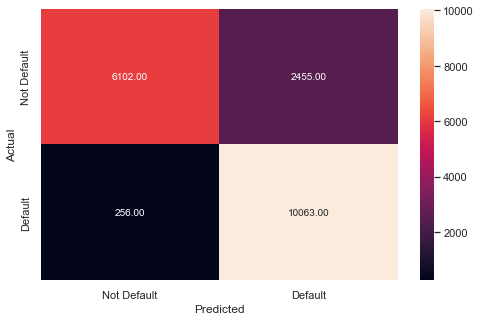

In [151]:
# Checking performance on the testing data based on the tuned model

y_pred_test2 = d_tree_tuned.predict(x_test)
metrics_score(y_test, y_pred_test2)

#### Plotting the Decision Tree

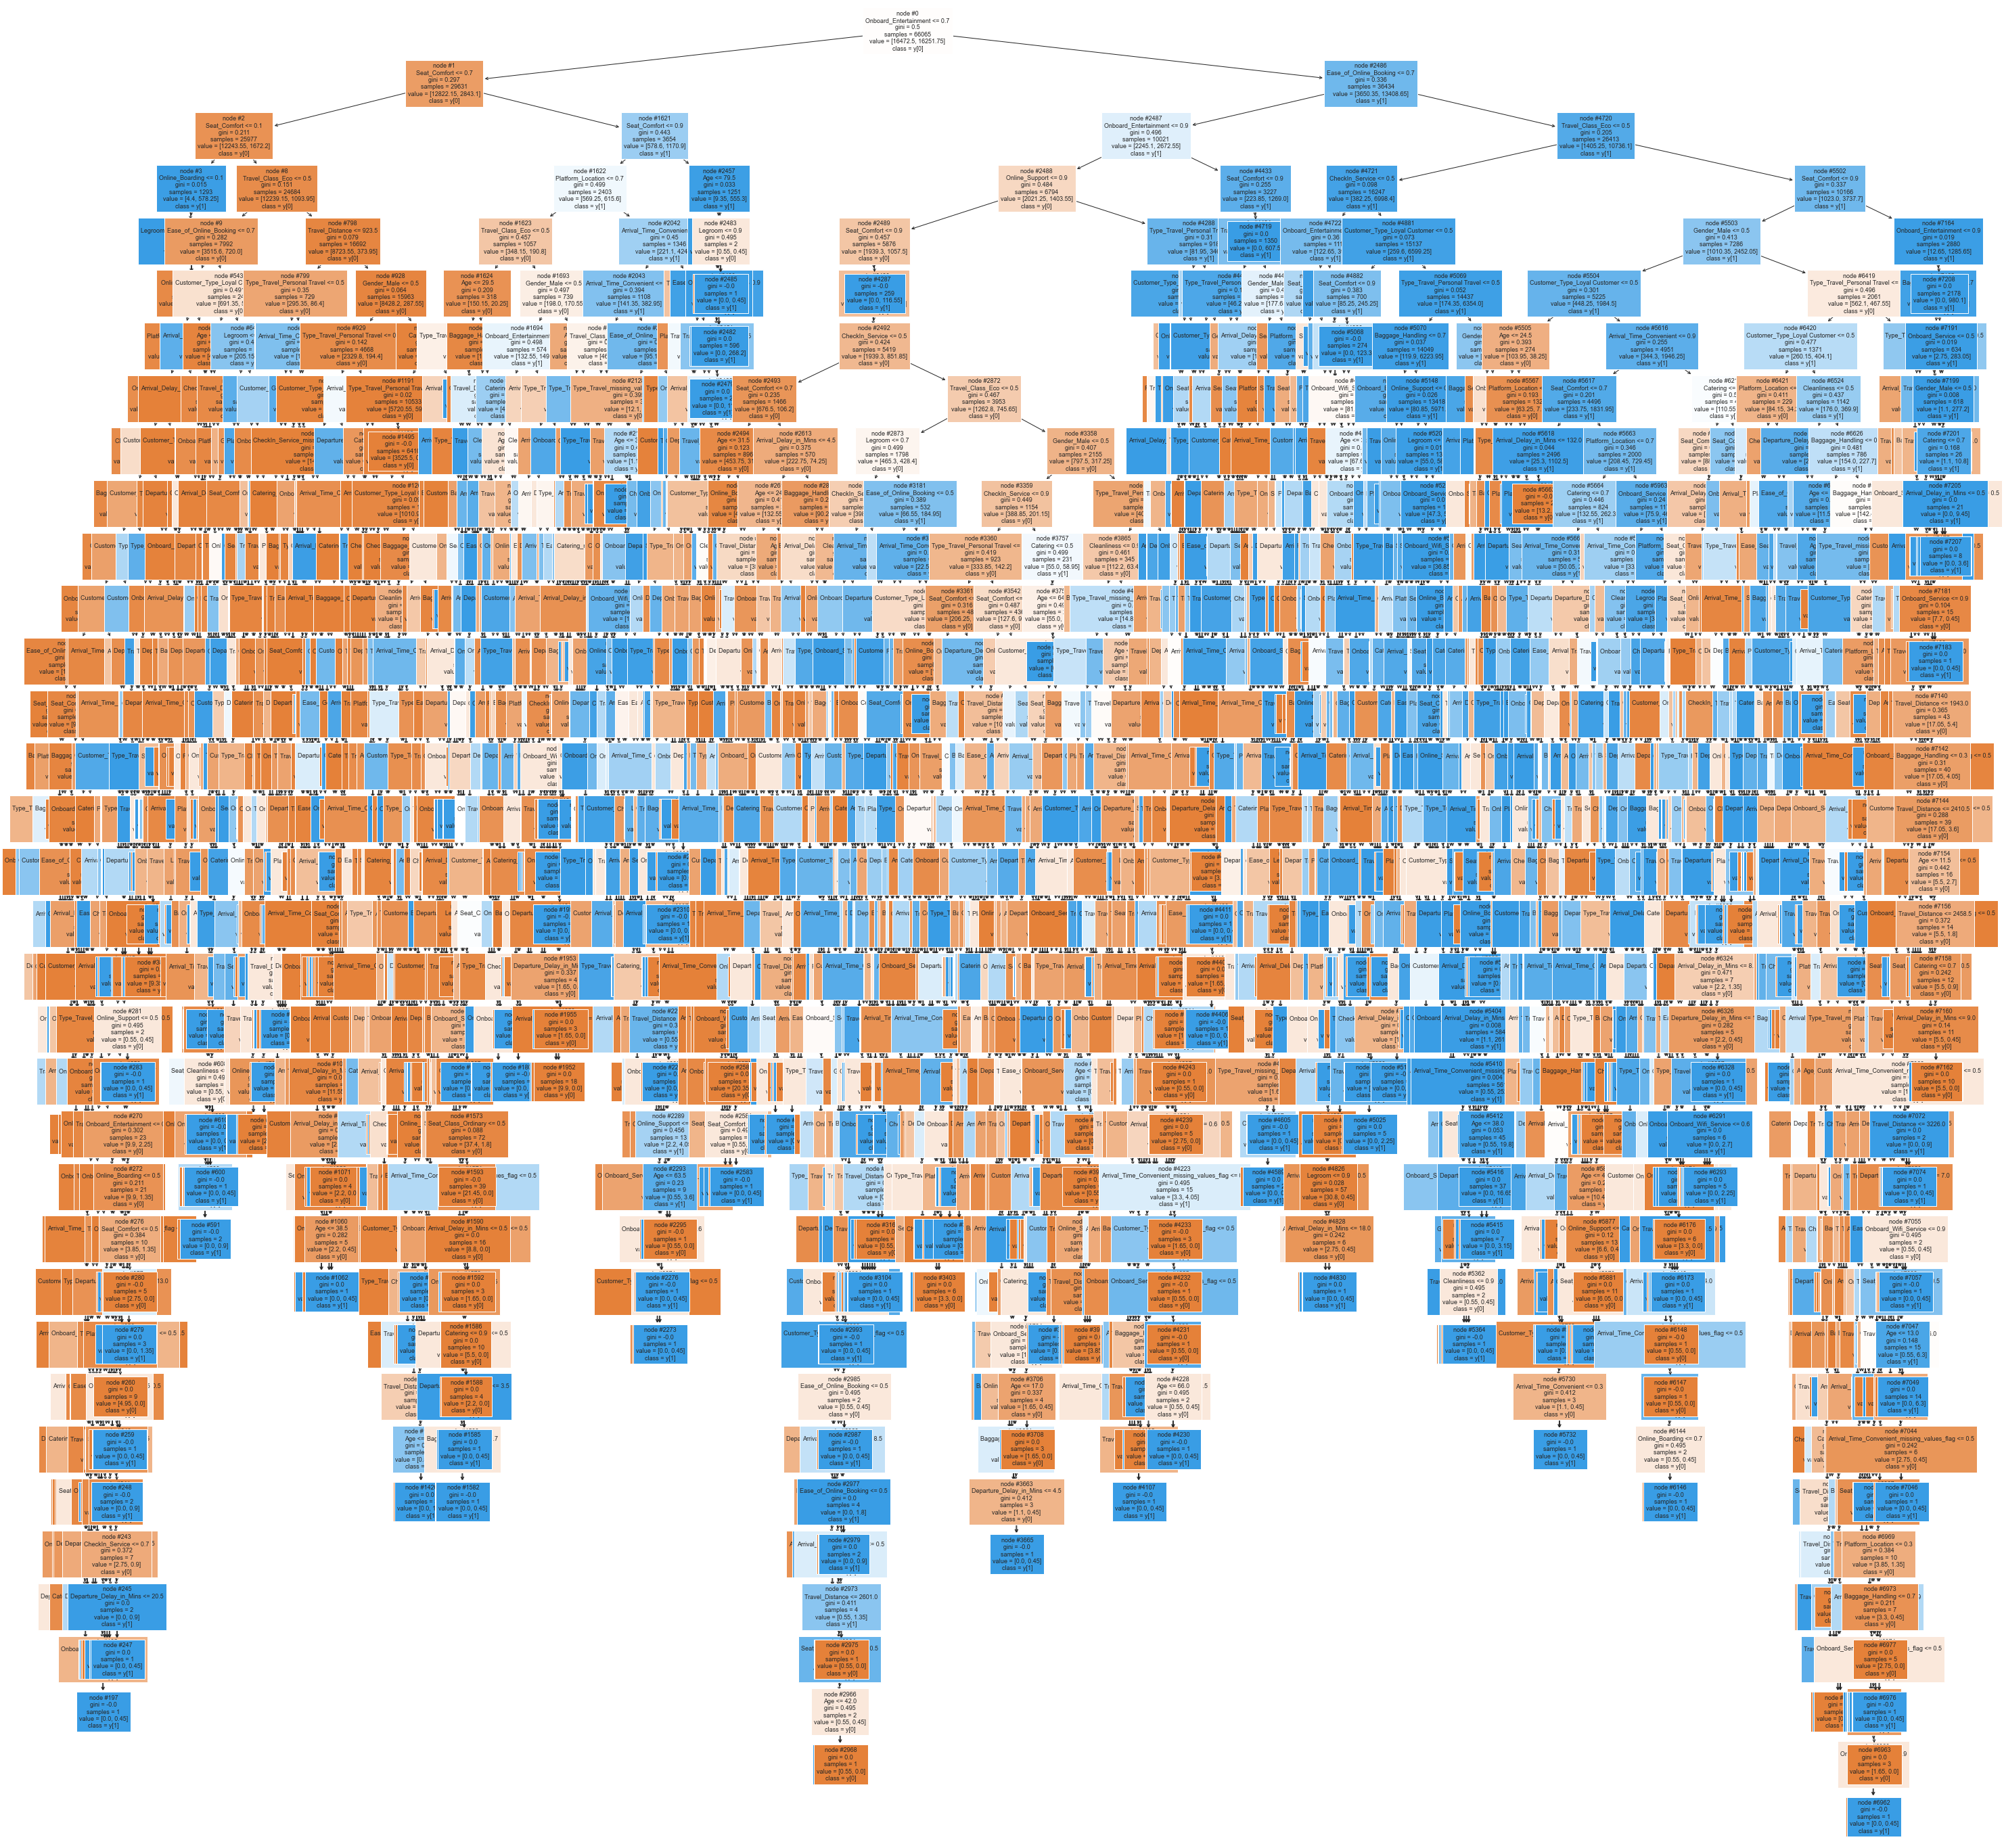

In [142]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (50, 50))

tree.plot_tree(d_tree, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:**
Blue leaves represent the satisfied travellers, i.e., y[1] and the orange leaves represent the not satisfied travellers, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.

In [153]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                                  Imp
Onboard_Entertainment                        0.439223
Seat_Comfort                                 0.307697
Ease_of_Online_Booking                       0.084702
Travel_Class_Eco                             0.055718
Type_Travel_Personal Travel                  0.051975
Customer_Type_Loyal Customer                 0.036988
Gender_Male                                  0.023698
Ease_of_Online_Booking_missing_values_flag   0.000000
Arrival_Time_Convenient_missing_values_flag  0.000000
Catering_missing_values_flag                 0.000000
Platform_Location_missing_values_flag        0.000000
Onboard_Wifi_Service_missing_values_flag     0.000000
Onboard_Entertainment_missing_values_flag    0.000000
Online_Support_missing_values_flag           0.000000
Age                                          0.000000
Onboard_Service_missing_values_flag          0.000000
Legroom_missing_values_flag                  0.000000
Baggage_Handling_missing_val

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [92]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier()
rf_estimator.fit(x_train, y_train)

RandomForestClassifier()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



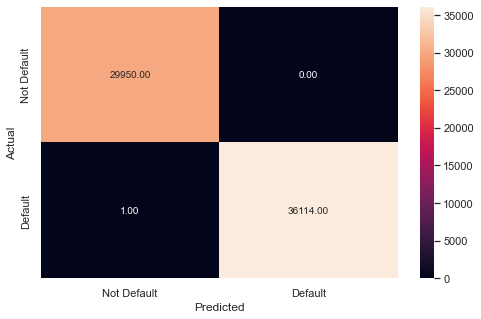

In [93]:
#Checking performance on the training data

y_pred_train_3 = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12836
           1       0.95      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



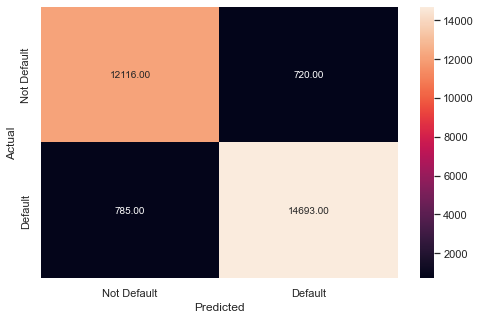

In [94]:
# Checking performance on the test data

y_pred_test3 = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test3)

### **Build a Random Forest model with Class Weights**

In [100]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf_estimator_1 = RandomForestClassifier(class_weight = {0: 0.55, 1: 0.45}, random_state = 7, n_jobs = -1)

# Fitting Random Forest model

rf_estimator_1.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.55, 1: 0.45}, n_jobs=-1,
                       random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



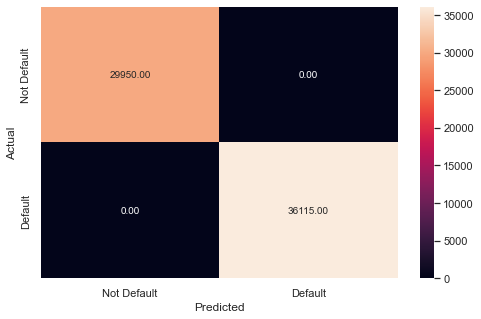

In [101]:
# Checking performance on the train data

y_pred_train_4 = rf_estimator_1.predict(x_train)
metrics_score(y_train, y_pred_train_4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12836
           1       0.95      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



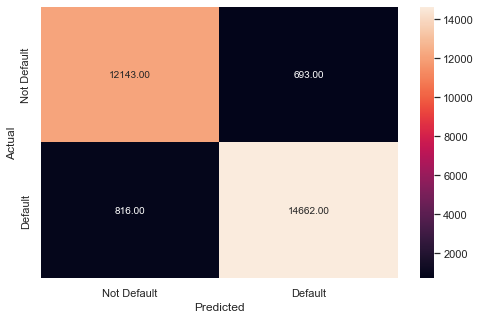

In [102]:
# Checking performance on the test data

y_pred_test_4 = rf_estimator_1.predict(x_test)
metrics_score(y_test, y_pred_test_4)

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [188]:
# Choose the type of classifier. 

#rf_estimator_tuned = RandomForestClassifier(criterion = "gini", random_state = 7)
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.2,1:0.8}, random_state=1, oob_score=True, bootstrap=True)

# Grid of parameters to choose from

#parameters = {"n_estimators": [110, 120],
#    "max_depth": [6, 7],
#    "min_samples_leaf": [20, 25],
#    "max_features": [0.8, 0.9],
#    "max_samples": [0.9, 1],
#    "class_weight": ["balanced",{0: 0.35, 1: 0.65}]
#             }

parameters = {"n_estimators": np.arange(10,110,10),
    #"max_depth": [6, 7],
    "min_samples_leaf": np.arange(1,15,5),
    "max_features": ['sqrt', 'log2', None, 65],
    "min_samples_split": np.arange(2, 20, 5)
    #"class_weight": ["balanced",{0: 0.35, 1: 0.65}]
             }


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5, n_jobs = -1)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters

rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features='log2',
                       min_samples_leaf=11, n_estimators=10, oob_score=True,
                       random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3355
           1       0.68      0.87      0.76       817

    accuracy                           0.89      4172
   macro avg       0.82      0.88      0.85      4172
weighted avg       0.91      0.89      0.90      4172



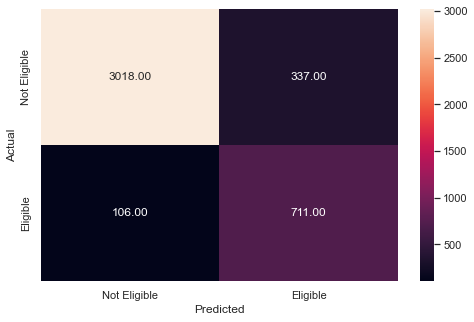

In [189]:
# Checking performance on the training data

y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1416
           1       0.67      0.78      0.72       372

    accuracy                           0.87      1788
   macro avg       0.80      0.84      0.82      1788
weighted avg       0.88      0.87      0.88      1788



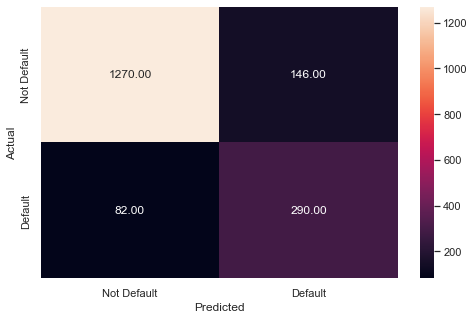

In [224]:
# Checking performace on test dataset

y_pred_test5 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test5)

#### Plot the Feature importance of the tuned Random Forest

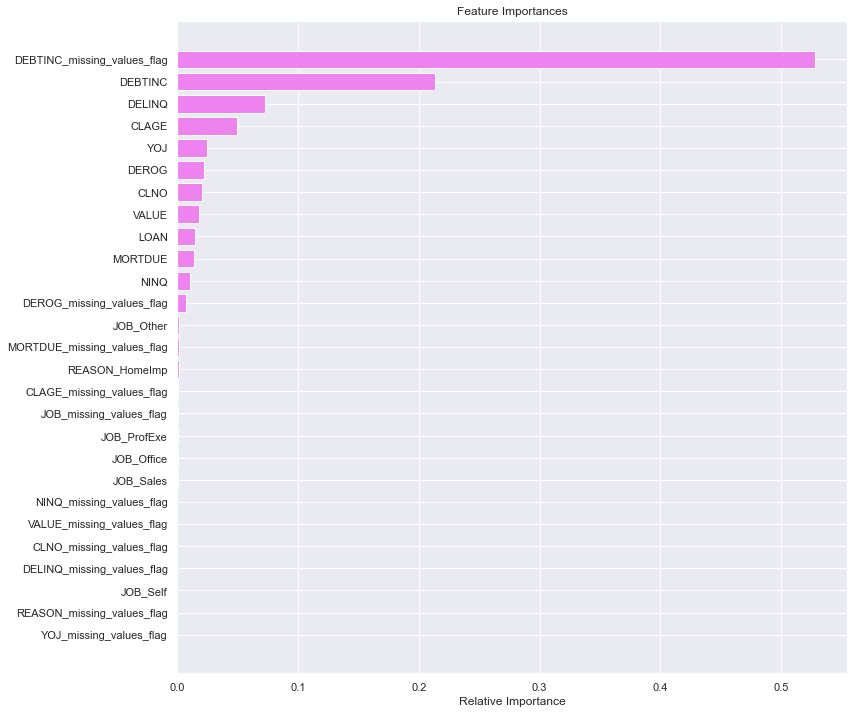

In [169]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Comparing Model Performances**

In [192]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [193]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [194]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [195]:
# Make the list of all the model names 

models = [lg, d_tree, d_tree_tuned, rf_estimator, rf_estimator_tuned]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [196]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Logistic Regression        0.601630       0.604586      0.673195   
1        Decision Tree        1.000000       0.865772      1.000000   
2  Tuned Decision Tree        0.854027       0.845078      0.823745   
3        Random Forest        1.000000       0.912192      1.000000   
4  Tuned Random Forest        0.893816       0.872483      0.870257   

   Test_Recall  Train_Precision  Test_Precision  
0     0.658602         0.282776        0.296970  
1     0.610215         1.000000        0.704969  
2     0.790323         0.591388        0.596349  
3     0.698925         1.000000        0.852459  
4     0.779570         0.678435        0.665138

In [148]:
# Gradient Boost Model

In [103]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8557
           1       0.96      0.95      0.96     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



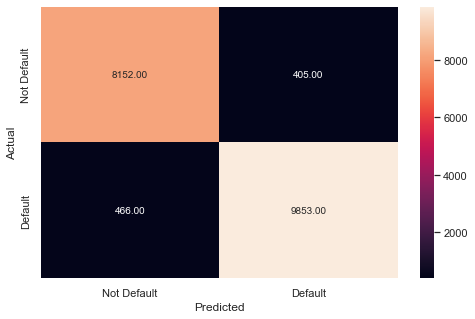

In [138]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train, y_train)

# Model Performance on the test data
#xgb_perf_test = model_performance_classification(xgb,X_test,y_test)
#xgb_perf_test

y_xgb_pred = xgb.predict(x_test)

metrics_score(y_test, y_xgb_pred)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12836
           1       0.96      0.95      0.96     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



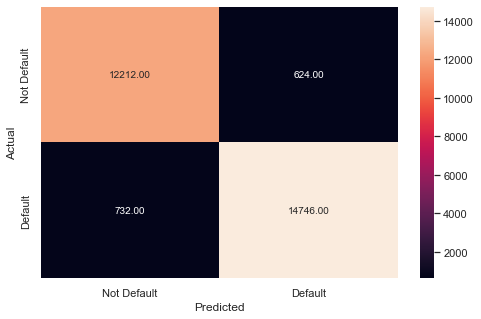

In [108]:
# Choose the type of classifier. 

#rf_estimator_tuned = RandomForestClassifier(criterion = "gini", random_state = 7)
xgb_estimator_tuned = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Grid of parameters to choose from


parameters = {"booster": ['gbtree', 'gblinear', 'dart'],
    "min_child_weight": np.arange(1,25,5),
    
             }


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(xgb_estimator_tuned, parameters, scoring = scorer, cv = 5, n_jobs = -1)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters

xgb_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

xgb_estimator_tuned.fit(x_train, y_train)

y_xgb_tuned_pred = xgb_estimator_tuned.predict(x_test)

metrics_score(y_test, y_xgb_tuned_pred)

# Light GBM model

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

In [131]:
#import lightgbm as lgb
from lightgbm import LGBMClassifier
import datetime as dt

lgbm_estimator_tuned = LGBMClassifier()

#train_data=lgb.Dataset(x_train,label=y_train)

param = {'num_leaves':150, 'objective':'binary','max_depth':8,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

grid_obj = GridSearchCV(lgbm_estimator_tuned, parameters, scoring = scorer, cv = 5, n_jobs = -1)

grid_obj = grid_obj.fit(x_train, y_train)

lgbm_estimator_tuned = grid_obj.best_estimator_

lgbm_estimator_tuned.fit(x_train, y_train)

y_lgbm_tuned_pred = lgbm_estimator_tuned.predict(x_test)

[LightGBM] [Warning] Unknown parameter: booster


In [132]:
y_lgbm_tuned_pred = lgbm_estimator_tuned.predict(x_test)
#y_lgbm_tuned_pred[0:5]  # showing first 5 predictions

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8557
           1       0.96      0.95      0.95     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



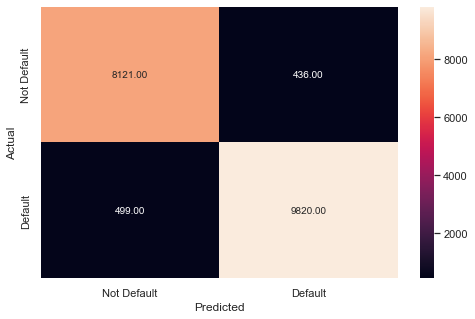

In [133]:
#y_lgbm_tuned_pred.shape
metrics_score(y_test, y_lgbm_tuned_pred)

# Prod code and model starts here

In [58]:
survey_train_prod=pd.read_csv("Surveydata_test.csv")
travel_train_prod=pd.read_csv("Traveldata_test.csv")

In [59]:
# Copying data to another variable to avoid any changes to original data
data_survey_train_prod=survey_train_prod.copy()
data_travel_train_prod=travel_train_prod.copy()

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

In [60]:
data_ts_prod = data_travel_train_prod.merge(data_survey_train_prod,left_on="ID",right_on="ID",how="inner")

In [61]:
cat_cols_prod = data_ts_prod.select_dtypes(['object']).columns.tolist()

In [62]:
cat_cols_prod

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [63]:
for i in cat_cols_prod:
    data_ts_prod[i] = data_ts_prod[i].astype('category')

# Missing value treatment for categorical variables 

In [64]:
#True copy of data in data_ts_raw - commented to save it from copying over bad data later

data_ts_prod_raw = data_ts_prod.copy()

#### Adding new columns in the dataset for each column which has missing values 

In [65]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [66]:
# list of columns that has missing values in it
missing_col_prod = [col for col in data_ts_prod.columns if data_ts_prod[col].isnull().any()]

for colmn in missing_col_prod:
    add_binary_flag(data_ts_prod,colmn)
    

# Filling missing values in category columns with  mode and some custom logic

In [67]:
cat_cols_prod = data_ts_prod.select_dtypes('category').columns.tolist()
cat_cols_prod

for col in cat_cols_prod:
    column_nan_prod = data_ts_prod[col].isnull().any()
    if(column_nan_prod):        
        mode_prod = data_ts_prod[col].mode()[0]
        
        print(col," ", column_nan_prod, " ", mode_prod)
        data_ts_prod[col] = data_ts_prod[col].fillna(mode_prod)
    
#data_ts[col].isnull().sum()

Gender   True   Female
Customer_Type   True   Loyal Customer
Type_Travel   True   Business Travel
Seat_Comfort   True   Acceptable
Arrival_Time_Convenient   True   Good
Catering   True   Acceptable
Platform_Location   True   Manageable
Onboard_Wifi_Service   True   Good
Onboard_Entertainment   True   Good
Online_Support   True   Good
Ease_of_Online_Booking   True   Good
Onboard_Service   True   Good
Legroom   True   Good
Baggage_Handling   True   Good
CheckIn_Service   True   Good
Cleanliness   True   Good
Online_Boarding   True   Good


In [68]:
for col in cat_cols_prod:
    column_nan_test_prod = data_ts_prod[col].isnull().any()
    print(column_nan_test_prod)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [69]:
cat_cols_1_prod= data_ts_prod.select_dtypes(['category'])
for i in cat_cols_1_prod.columns:
    print('Unique values in',i, 'are :')
    print(data_ts_prod[i].value_counts(dropna=False)/data_ts_prod.shape[0]*100)
    print('*'*40)

Unique values in Gender are :
Female    50.837032
Male      49.162968
Name: Gender, dtype: float64
****************************************
Unique values in Customer_Type are :
Loyal Customer       83.512162
Disloyal Customer    16.487838
Name: Customer_Type, dtype: float64
****************************************
Unique values in Type_Travel are :
Business Travel    72.358294
Personal Travel    27.641706
Name: Type_Travel, dtype: float64
****************************************
Unique values in Travel_Class are :
Eco         51.887534
Business    48.112466
Name: Travel_Class, dtype: float64
****************************************
Unique values in Seat_Comfort are :
Acceptable           22.540868
Needs Improvement    21.995955
Good                 21.931352
Poor                 16.164822
Excellent            13.634066
Extremely Poor        3.732936
Name: Seat_Comfort, dtype: float64
****************************************
Unique values in Seat_Class are :
Ordinary     50.165721
Green

# Missing value treatment for numerical columns

In [70]:
num_data_prod = data_ts_prod.select_dtypes('number')
data_ts_prod[num_data_prod.columns] = num_data_prod.fillna(num_data_prod.median())

In [71]:
#Check if there area any null values remaining 
data_ts_prod.isnull().sum()/data_ts_prod.shape[0]*100

ID                                             0.0
Gender                                         0.0
Customer_Type                                  0.0
Age                                            0.0
Type_Travel                                    0.0
Travel_Class                                   0.0
Travel_Distance                                0.0
Departure_Delay_in_Mins                        0.0
Arrival_Delay_in_Mins                          0.0
Seat_Comfort                                   0.0
Seat_Class                                     0.0
Arrival_Time_Convenient                        0.0
Catering                                       0.0
Platform_Location                              0.0
Onboard_Wifi_Service                           0.0
Onboard_Entertainment                          0.0
Online_Support                                 0.0
Ease_of_Online_Booking                         0.0
Onboard_Service                                0.0
Legroom                        

# Ordinal encoding for categorical columns

In [72]:
scale_mapper = {"Extremely Poor":0, "Poor":0.2, "Needs Improvement":0.4, "Acceptable":0.6, "Good":0.8, "Excellent":1.0}
scale_mapper_platform = {"Very Inconvenient":0, "Inconvenient":0.2, "Needs Improvement":0.4, "Manageable":0.6, "Convenient":0.8, "Very Convenient":1.0}
    
data_ts_prod["Platform_Location"] = data_ts_prod["Platform_Location"].replace(scale_mapper_platform)

cat_cols_2_prod = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service','Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness','Online_Boarding']

for col in cat_cols_2_prod:
    data_ts_prod[col] = data_ts_prod[col].replace(scale_mapper)

## **Data Preparation - One hot encoding for non-ordinal categorical variables**

In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

get_dummies_cols_prod = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']

data_ts_prod = pd.get_dummies(data = data_ts_prod, columns = get_dummies_cols_prod, drop_first = True)

### **Separating the target variable from other variables**

In [74]:
#Drop the ID col as it adds no value

data_ts_prod.drop(["ID"], axis = 1, inplace = True)

# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X_prod = data_ts_prod.copy()

In [87]:
X_prod

Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0      36.0              532                      0.0                    0.0   
1      21.0             1425                      9.0                   28.0   
2      60.0             2832                      0.0                    0.0   
3      29.0             1352                      0.0                    0.0   
4      18.0             1610                     17.0                    0.0   
...     ...              ...                      ...                    ...   
35597   8.0             1334                      0.0                    0.0   
35598  53.0             1772                      0.0                    0.0   
35599  22.0             1180                      0.0                    0.0   
35600  67.0              420                     23.0                   16.0   
35601  20.0             1680                      0.0                    0.0   

       Seat_Comfort  Arrival_Time_Convenient  Catering  Platform_Location  \
0               0.6                      0.6       0.6                0.6   
1               0.0                      0.8       0.2                0.6   
2               1.0                      1.0       1.0                1.0   
3               0.6                      1.0       0.6                1.0   
4               1.0                      0.0       1.0                0.4   
...             ...                      ...       ...                ...   
35597           0.4                      1.0       0.4                0.6   
35598           0.4                      0.4       0.8                0.4   
35599           0.8                      0.0       0.8                0.4   
35600           1.0                      1.0       1.0                0.2   
35601           0.8                      0.6       0.8                0.6   

       Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
0                       0.4                    1.0             0.8   
1                       0.6                    0.2             0.6   
2                       1.0                    1.0             1.0   
3                       0.2                    0.6             1.0   
4                       1.0                    1.0             1.0   
...                     ...                    ...             ...   
35597                   0.6                    0.4             0.6   
35598                   0.6                    1.0             1.0   
35599                   0.4                    0.8             0.2   
35600                   0.6                    1.0             0.8   
35601                   0.2                    0.8             0.2   

       Ease_of_Online_Booking  Onboard_Service  Legroom  Baggage_Handling  \
0                         1.0              1.0      1.0               1.0   
1                         0.6              1.0      0.6               0.8   
2                         0.4              0.4      0.4               0.4   
3                         0.2              0.6      0.4               1.0   
4                         1.0              0.8      0.6               1.0   
...                       ...              ...      ...               ...   
35597                     0.6              0.8      1.0               0.8   
35598                     0.8              0.8      0.8               0.8   
35599                     0.4              0.2      0.6               0.2   
35600                     1.0              1.0      1.0               1.0   
35601                     0.2              0.6      0.8               0.8   

       CheckIn_Service  Cleanliness  Online_Boarding  \
0                  0.8          1.0              0.2   
1                  0.6          1.0              0.6   
2                  0.8          0.4              1.0   
3                  1.0          1.0              0.2   
4                  1.0          1.0              1.0   
...                .

In [75]:
#untrained decision tree prediction
y_dtree_ut_pred_prod = d_tree.predict(X_prod)

In [84]:
type(y_dtree_ut_pred_prod)

numpy.ndarray

In [88]:
y_dtree_ut_pred_prod.shape

(35602,)

In [144]:
np.savetxt("dtree.csv", y_dtree_ut_pred_prod, delimiter=",")

In [95]:
#untrained Random Forest prediction
y_rf_ut_pred_prod = rf_estimator.predict(X_prod)

In [97]:
y_rf_ut_pred_prod.shape

(35602,)

In [99]:
np.savetxt("rf.csv", y_rf_ut_pred_prod, delimiter=",")

In [139]:
#untrained XG Boost algo
y_xgb_ut_pred_prod = xgb.predict(X_prod)

In [140]:
y_xgb_ut_pred_prod.shape

(35602,)

In [141]:
np.savetxt("xgb_ut_1.csv", y_xgb_ut_pred_prod, delimiter=",")

In [135]:
# LGBM model

y_lgbm_tuned_pred_prod = lgbm_estimator_tuned.predict(X_prod)

In [136]:
y_lgbm_tuned_pred_prod.shape

(35602,)

In [137]:
np.savetxt("lgbm.csv", y_lgbm_tuned_pred_prod, delimiter=",")